# Homework 1 : Data Mining

### Student Information
Name: 廖軒鴻

Student ID: 111164524

GitHub ID: ninjat6

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [36]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. The Data
In this notebook we will explore the popular 20 newsgroup dataset, originally provided here. The dataset is called "Twenty Newsgroups", which means there are 20 categories of news articles available in the entire dataset. A short description of the dataset, provided by the authors, is provided below:

     ● The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. To the best of our knowledge, it was originally collected by Ken Lang, probably for his paper “Newsweeder: Learning to filter netnews,” though he does not explicitly mention this collection. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.
If you need more information about the dataset please refer to the reference provided above. Below is a snapshot of the dataset already converted into a table. Keep in mind that the original dataset is not in this nice pretty format. That work is left to us. That is one of the tasks that will be covered in this notebook: how to convert raw data into convenient tabular formats using Pandas.

# 2. Data Preparation
In the following we will use the built-in dataset loader for 20 newsgroups from scikit-learn. Alternatively, it is possible to download the dataset manually from the website and use the sklearn.datasets.load_files function by pointing it to the 20news-bydate-train sub-folder of the uncompressed archive folder.

In order to get faster execution times for this first example we will work on a partial dataset with only 4 categories out of the 20 available in the dataset:

In [37]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [38]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [39]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [40]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [41]:
len(twenty_train.data)

2257

In [42]:
len(twenty_train.filenames)

2257

#### We can also print an example from the subset

In [43]:
# An example of what the subset contains
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [44]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [45]:
twenty_train.target[0]

1

In [46]:
# category of first 10 documents.
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [47]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


##  >>> Exercise 1 (5 min):

In [48]:
# An example of what the subset contains
for i in twenty_train.data[:3]:
    #print("\n".join(i.split("\n")))
    print(i)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

# 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

### 3.1 Converting Dictionary into Pandas Dataframe

In [49]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [50]:
len(X)

2257

In [51]:
X[0:2]

text
0  From: sd345@city.ac.uk (Michael Collier) Subje...
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...

In [52]:
for t in X["text"][:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

### Adding Columns
One of the great advantages of a pandas dataframe is its flexibility. We can add columns to the current dataset programmatically with very little effort.

In [53]:
# add category to the dataframe
X['category'] = twenty_train.target

In [54]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [55]:
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

### 3.2 Familiarizing yourself with the Data

In [56]:
# a simple query
X[:10][["text","category_name"]]

text           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  soc.religion.christian
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...  soc.religion.christian
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...  soc.religion.christian
7  From: aldridge@netcom.com (Jacquelin Aldridge)...                 sci.med
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...                 sci.med
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...                 sci.med

#### Let's query the last 10 records

In [57]:
X[-10:]

text  category  \
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2251  From: Mark-Tarbell@suite.com Subject: Amniocen...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
2247  soc.religion.christian  
2248           comp.graphics  
2249  soc.religion.christian  
2250             alt.atheism  
2251                 sci.med  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med

In [58]:
# using loc (by label)
X.loc[:10, 'text']

0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...
7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
Name: text, dtype: object

In [59]:
# using iloc (by position)
X.iloc[:10, 0]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

## >>> Exercise 2 (take home):
Selecting random samples
A random selection of rows or columns from a Series or DataFrame with the sample() method.The method will sample rows by default, and accepts a specific number of rows/columns to return, or a fraction of rows.

In [60]:
# When no arguments are passed, returns 1 row.
X.sample()

# One may specify either a number of rows:
X.sample(n=3)

# Or a fraction of the rows:
X.sample(frac=0.5)

text  category  \
1648  From: ajs8@kimbark.uchicago.edu (adam jeremy s...         1   
1590  From: SITUNAYA@IBM3090.BHAM.AC.UK Subject: (No...         1   
1099  From: george@ccmail.larc.nasa.gov (George M. B...         1   
152   From: shimpei@leland.Stanford.EDU (Shimpei Yam...         3   
2144  From: berger@chaos.cs.brandeis.edu (David Berg...         1   
...                                                 ...       ...   
810   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
746   From: fulk@cs.rochester.edu (Mark Fulk) Subjec...         2   
369   From: rsteele@adam.ll.mit.edu (Rob Steele) Sub...         3   
280   From: bhjelle@carina.unm.edu () Subject: Re: F...         2   
2079  From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...         0   

               category_name  
1648           comp.graphics  
1590           comp.graphics  
1099           comp.graphics  
152   soc.religion.christian  
2144           comp.graphics  
...                      ...  
810              alt.atheism  
746                  sci.med  
369   soc.religion.christian  
280                  sci.med  
2079             alt.atheism  

[1128 rows x 3 columns]

## >>> Exercise 3 (5 min):

In [61]:
X[X["category_name"] == "sci.med"].iloc[::10][0:5]

text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med

# 4. Data Mining using Pandas
Let's do some serious work now. Let's learn to program some of the ideas and concepts learned so far in the data mining course. This is the only way we can be convince ourselves of the true power of Pandas dataframes.

In [62]:
# check missing values
X.isnull()

text  category  category_name
0     False     False          False
1     False     False          False
2     False     False          False
3     False     False          False
4     False     False          False
...     ...       ...            ...
2252  False     False          False
2253  False     False          False
2254  False     False          False
2255  False     False          False
2256  False     False          False

[2257 rows x 3 columns]

In [63]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

## >>> Exercise 4 (5 min):

In [64]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

In [65]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [66]:
dummy_series

text        dummy_record
category               1
dtype: object

In [67]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

text category
0  dummy_record        1

In [68]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [69]:
# check if the records was commited into result
len(result_with_series)

2258

In [70]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

In [71]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [72]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [73]:
len(X)

2258

In [74]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

In [75]:
X.dropna(inplace=True)

In [76]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

In [77]:
len(X)

2257

## >>> Exercise 5 (take home)

In [78]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [79]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer
#### A.  np.nan : meaning is not a number, so .isnull() return True
#### B.  There have no value, so .isnull() return True
#### C.  'NaN' : it is seen as a string, so .isnull() return False
#### D.  'None' : it is seen as a string, so .isnull() return False
#### E.  None : it is used to define a null value, or no value at all, so .isnull() return True
#### F.  '' : it is seen as a string, so .isnull() return False

### 4.2 Dealing with Duplicate Data

In [80]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

In [81]:
sum(X.duplicated())

0

In [82]:
sum(X.duplicated('text'))

0

In [83]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [84]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [85]:
len(X)

2259

In [86]:
sum(X.duplicated('text'))

1

In [87]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [90]:
len(X)

2257

# 5. Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to perform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

    ● Aggregation
    ● Sampling
    ● Dimensionality Reduction
    ● Feature Subset Selection
    ● Feature Creation
    ● Discretization and Binarization
    ● Attribute Transformation

### 5.1 Sampling

In [91]:
X_sample = X.sample(n=1000) #random state

In [92]:
len(X_sample)

1000

In [93]:
X_sample[0:4]

text  category  \
397   From: David.Bernard@central.sun.com (Dave Bern...         3   
793   From: caf@omen.UUCP (Chuck Forsberg WA7KGX) Su...         2   
265   From: bil@okcforum.osrhe.edu (Bill Conner) Sub...         0   
1408  From: cst@garfield.catt.ncsu.edu (Caroline Tsa...         1   

               category_name  
397   soc.religion.christian  
793                  sci.med  
265              alt.atheism  
1408           comp.graphics

## >>> Exercise 6 (take home):
Because of the sample(), it will random choosing the data in original. So sorting about the amounts of category might be different.

In [94]:
X.category.value_counts()

3    599
2    594
1    584
0    480
Name: category, dtype: int64

In [95]:
X_sample.category.value_counts()

3    273
1    263
2    253
0    211
Name: category, dtype: int64

In [275]:
print("Original data: min(): %d and max(): %d " %(X.category.value_counts().min(),X.category.value_counts().max()))
print("Sample data: min(): %d and max(): %d " %(X_sample.category.value_counts().min(),X_sample.category.value_counts().max()))

Original data: min(): 480 and max(): 599 
Sample data: min(): 211 and max(): 273 


In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


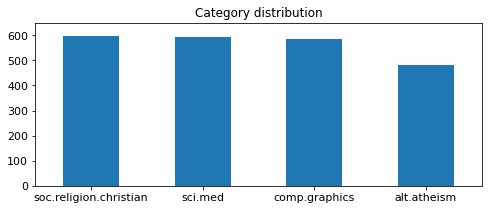

In [102]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

soc.religion.christian    273
comp.graphics             263
sci.med                   253
alt.atheism               211
Name: category_name, dtype: int64


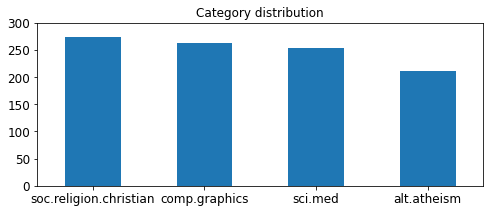

In [103]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [104]:
# You can use following command to see other available styles to prettify your charts.
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## >>> Exercise 7 (5 min):

soc.religion.christian    273
comp.graphics             263
sci.med                   253
alt.atheism               211
Name: category_name, dtype: int64


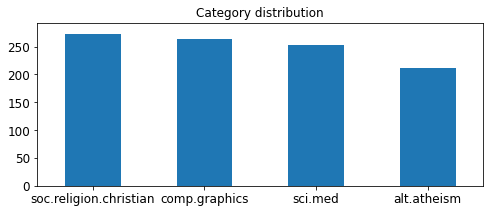

In [105]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0,max(X_sample.category_name.value_counts())+20], 
                                           rot = 0, fontsize = 12, figsize = (8,3))                                     

In [106]:
X['category'].value_counts().index

Int64Index([3, 2, 1, 0], dtype='int64')

In [107]:
X['category_name'].value_counts().index

Index(['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism'], dtype='object')

## >>> Exercise 8 (take home):

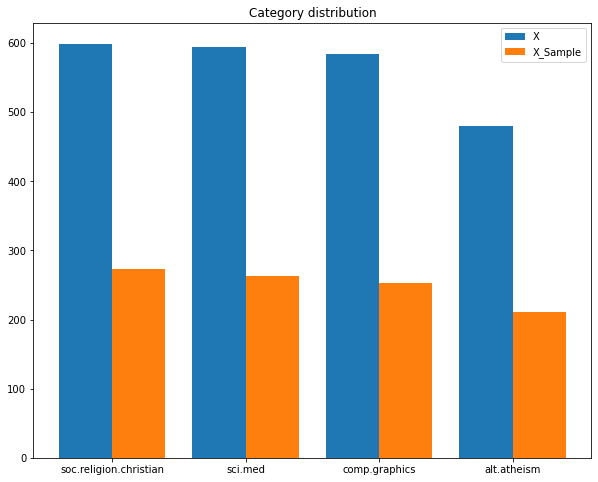

In [195]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

X_axis = np.arange(len(X.category_name.value_counts().array))

plt.bar(X_axis-0.2, X.category_name.value_counts().array, 0.4,
        label='X')

plt.bar(X_axis+0.2, X_sample.category_name.value_counts().array, 0.4,
        label='X_Sample')

plt.xticks(X_axis, X['category_name'].value_counts().index)
plt.title("Category distribution")
plt.legend()
plt.show()

### 5.2 Feature Creation

In [109]:
import nltk

In [110]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [111]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [112]:
X[0:4]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name                                           unigrams  
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...

In [113]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

### 5.3 Feature subset selection

In [114]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [115]:
count_vect.get_feature_names_out()[14887]

'from'

In [117]:
count_vect.get_feature_names_out()[29022]

'sd345'

In [118]:
count_vect.get_feature_names_out()[8696]

'city'

In [119]:
count_vect.get_feature_names_out()[4017]

'ac'

In [122]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [162]:
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

## >>> Exercise 9 (5 min):

In [123]:
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X.text[0])
analyze(X[0:1]['text'][0])
analyze(" ".join(list(X[:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [124]:
# We can check the shape of this matrix by:
X_counts.shape

(2257, 35788)

In [125]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

In [126]:
X_counts.shape

(2257, 35788)

In [127]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [128]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

## >>> Exercise 10 (take home):
Use np.where to find second '1' index in the array. Because the another '1' is 38th value in the record array, so just change the index of count_vect.get_feature_names_out()[] to 37. And we can find the anwser is '01' 

In [129]:
idx = np.where(X_counts[4][0:100].toarray()[0] == 1)[0][1]
count_vect.get_feature_names_out()[idx]

'01'

In [130]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [131]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [132]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many document]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

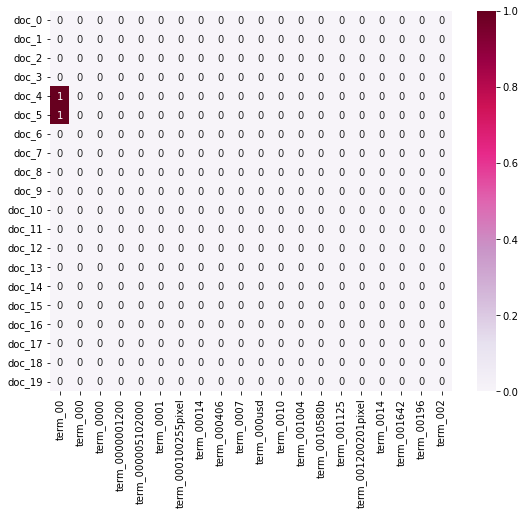

In [133]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## >>> Exercise 11 (take home):

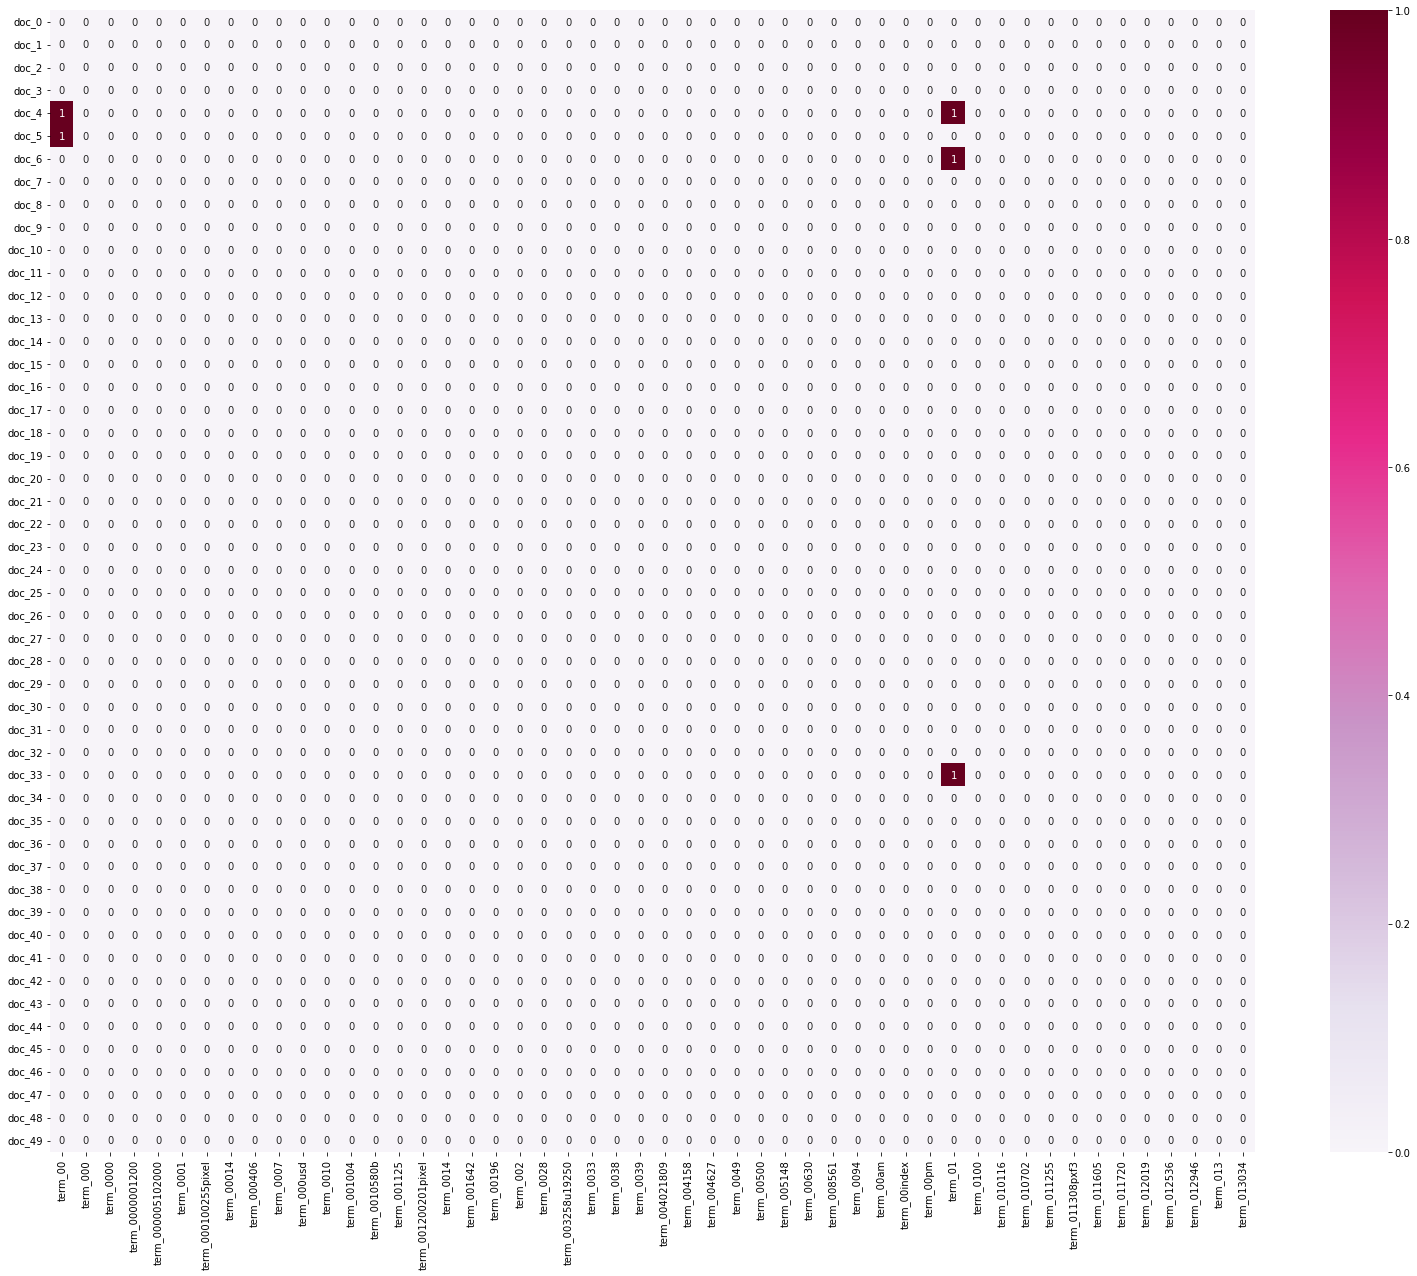

In [134]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:50]]

plot_y = ["doc_"+ str(i) for i in list(X.index)[0:50]]

plot_z = X_counts[0:50, 0:50].toarray() #X_counts[how many document]
plot_z

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(27, 21))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [136]:
from sklearn.decomposition import PCA

In [137]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [138]:
X_reduced.shape

(2257, 2)

In [139]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

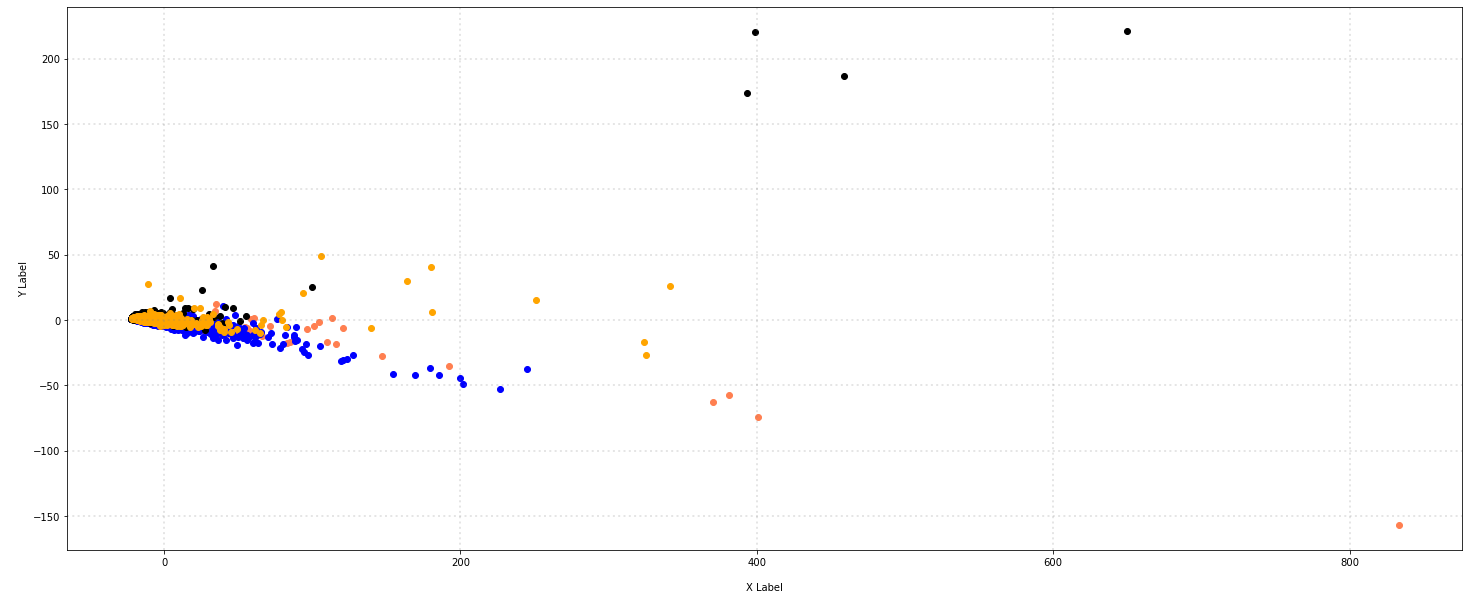

In [140]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

## >>> Exercise 12 (take home): 

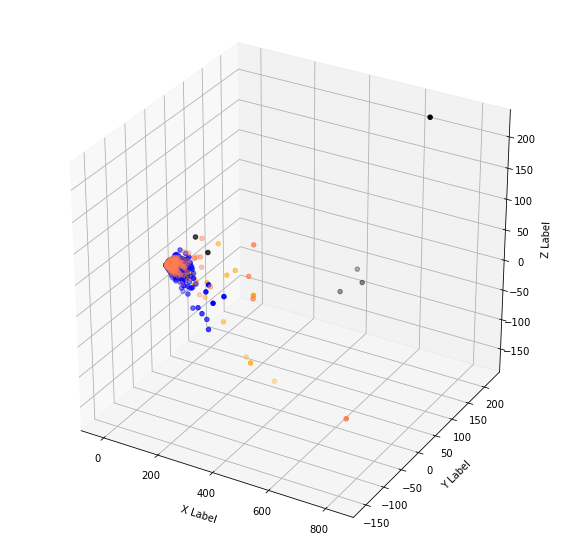

In [141]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,10))
#ax = fig.subplots()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

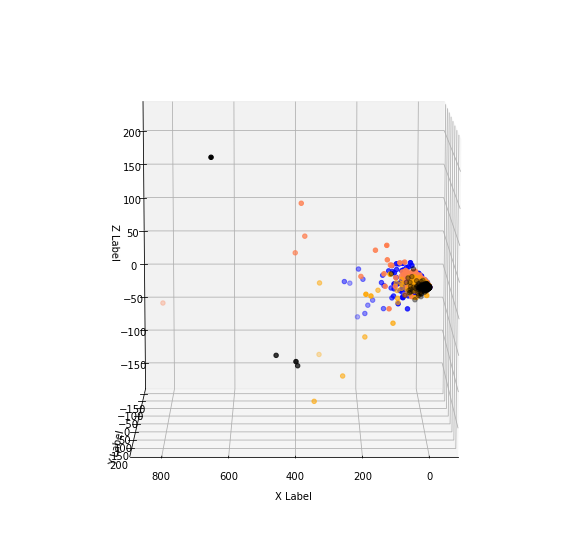

In [142]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,10))
#ax = fig.subplots()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=10,azim=90)
plt.show()

#### Use the view_init() function to rotate the surface. This function has two parameters, elev and azim.  The first parameter refers to the height from which the surface is viewed, and the second parameter refers to the angle of rotation.

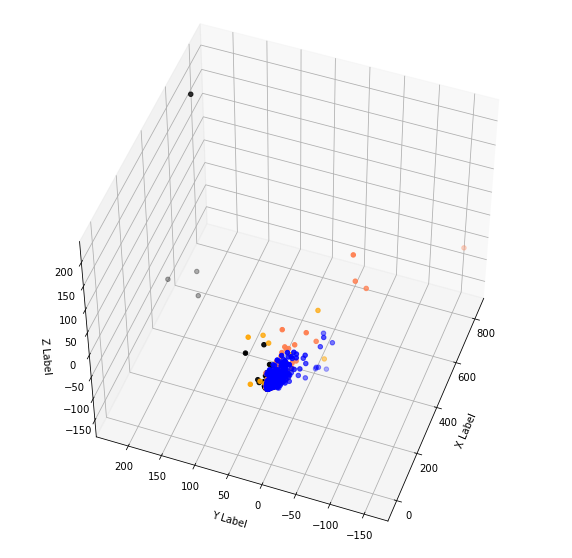

In [143]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,10))
#ax = fig.subplots()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=50,azim=200)

plt.show()

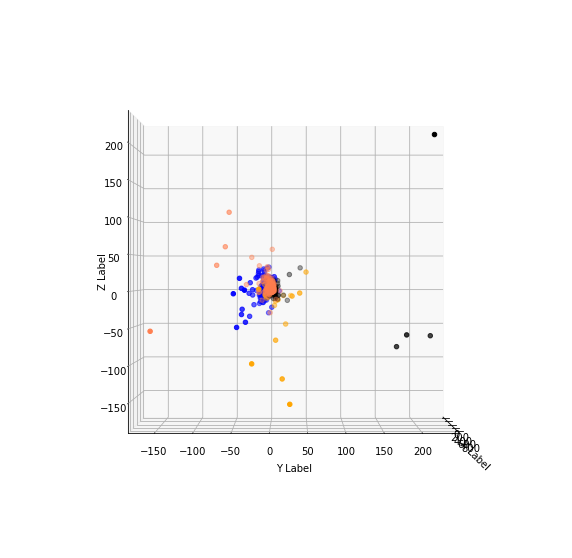

In [144]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,10))
#ax = fig.subplots()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=0,azim=0)

plt.show()

### 5.5 Attribute Transformation / Aggregation

In [145]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [146]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [147]:
term_frequencies[0] #sum of first term

134

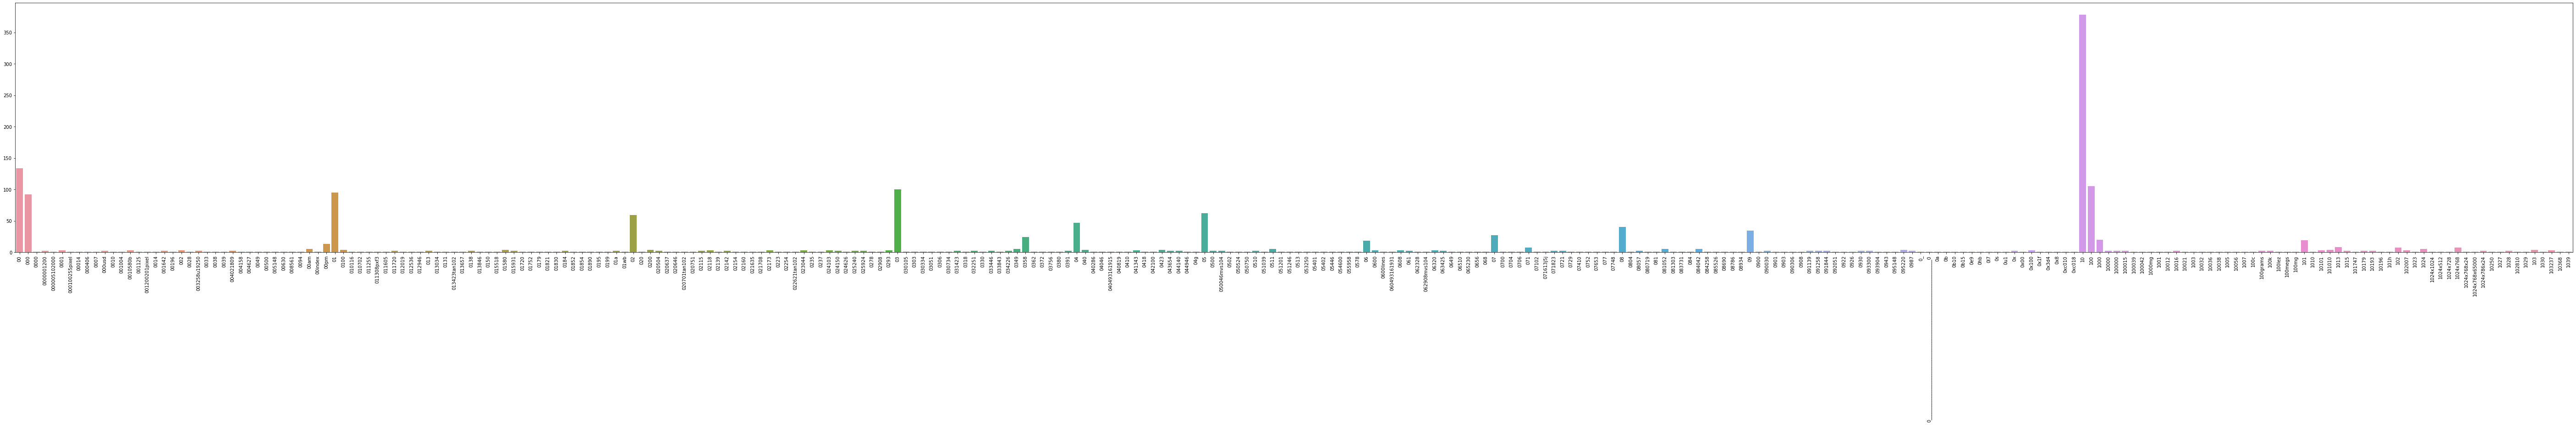

In [148]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


## >>> Exercise 13 (take home):

In [149]:
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])

fig.show()


## >>> Exercise 14 (take home):

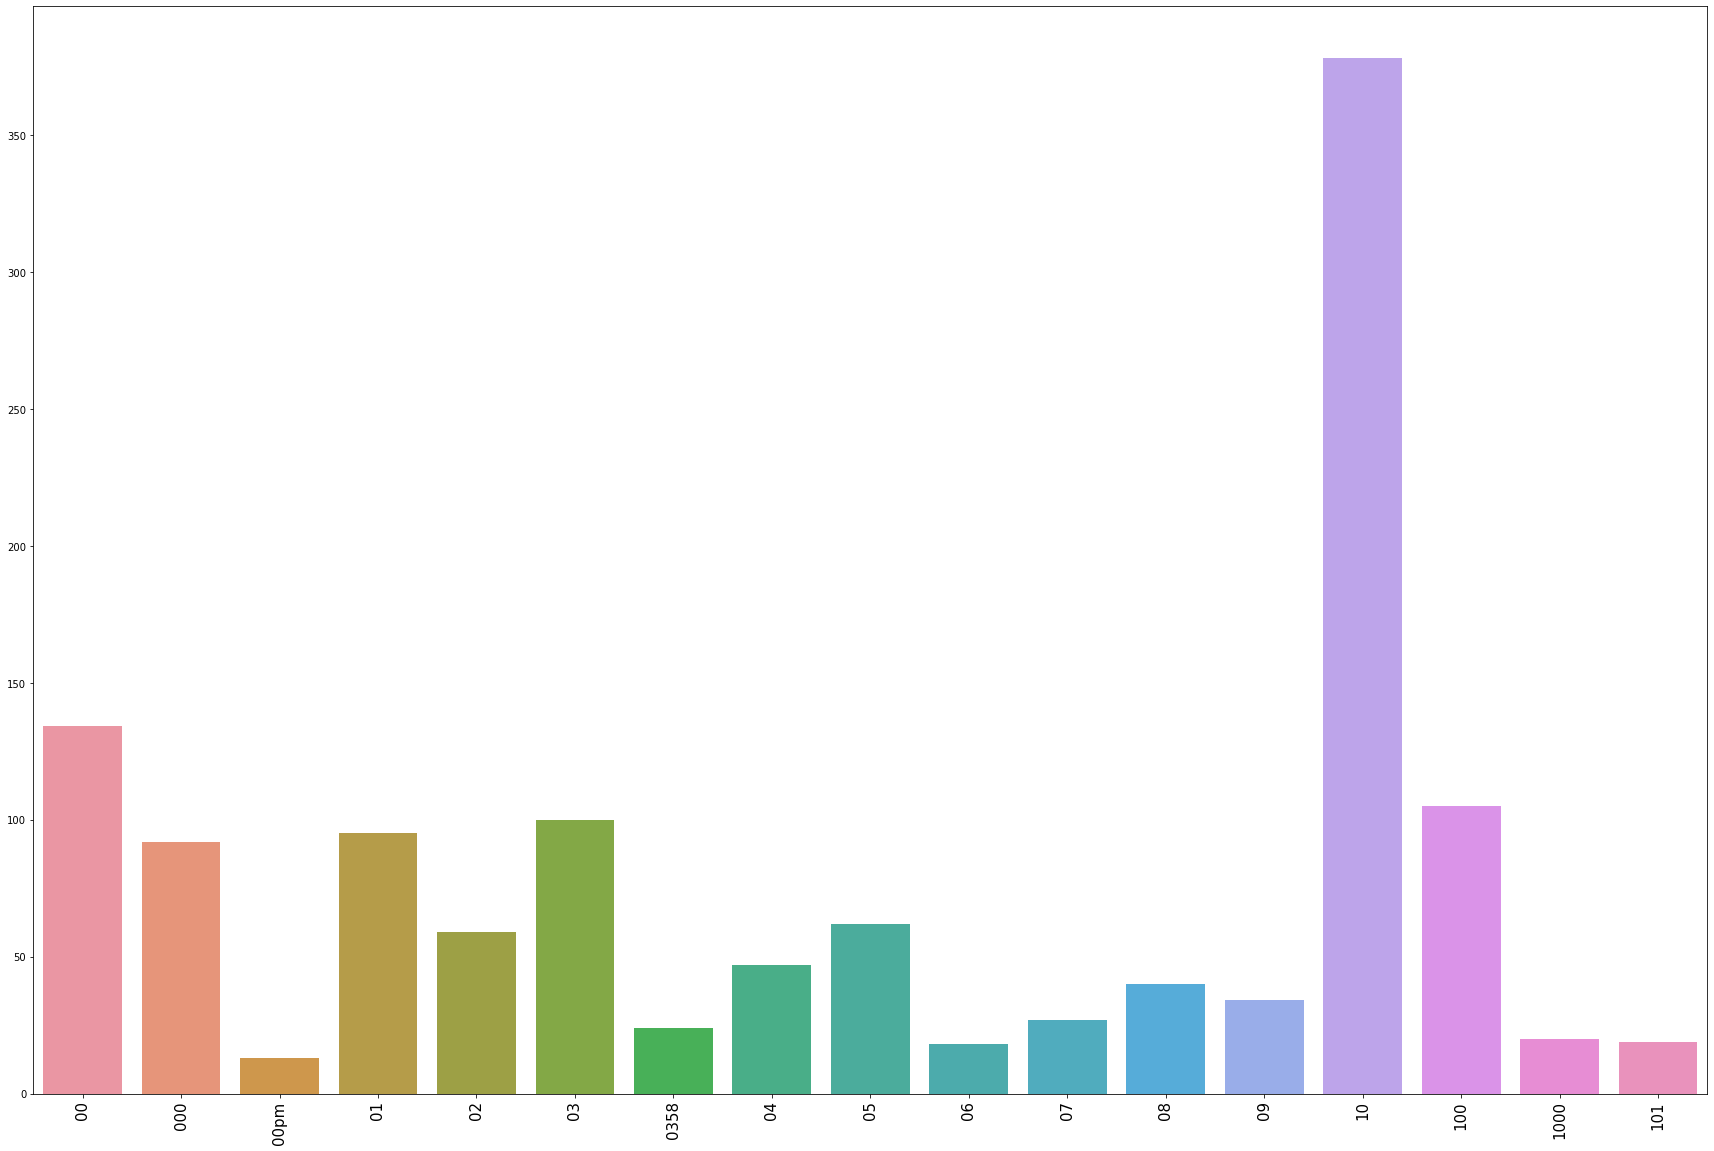

In [150]:
index = np.where(term_frequencies[:300] <= 10)
TF_reduce = np.delete(term_frequencies[:300], index)
CV_reduce = np.delete(count_vect.get_feature_names_out()[:300], index)

plt.subplots(figsize=(30, 20))
g = sns.barplot(x=CV_reduce, 
            y=TF_reduce)
g.set_xticklabels(CV_reduce, rotation = 90, fontsize = 15);

## >>> Exercise 15 (take home):

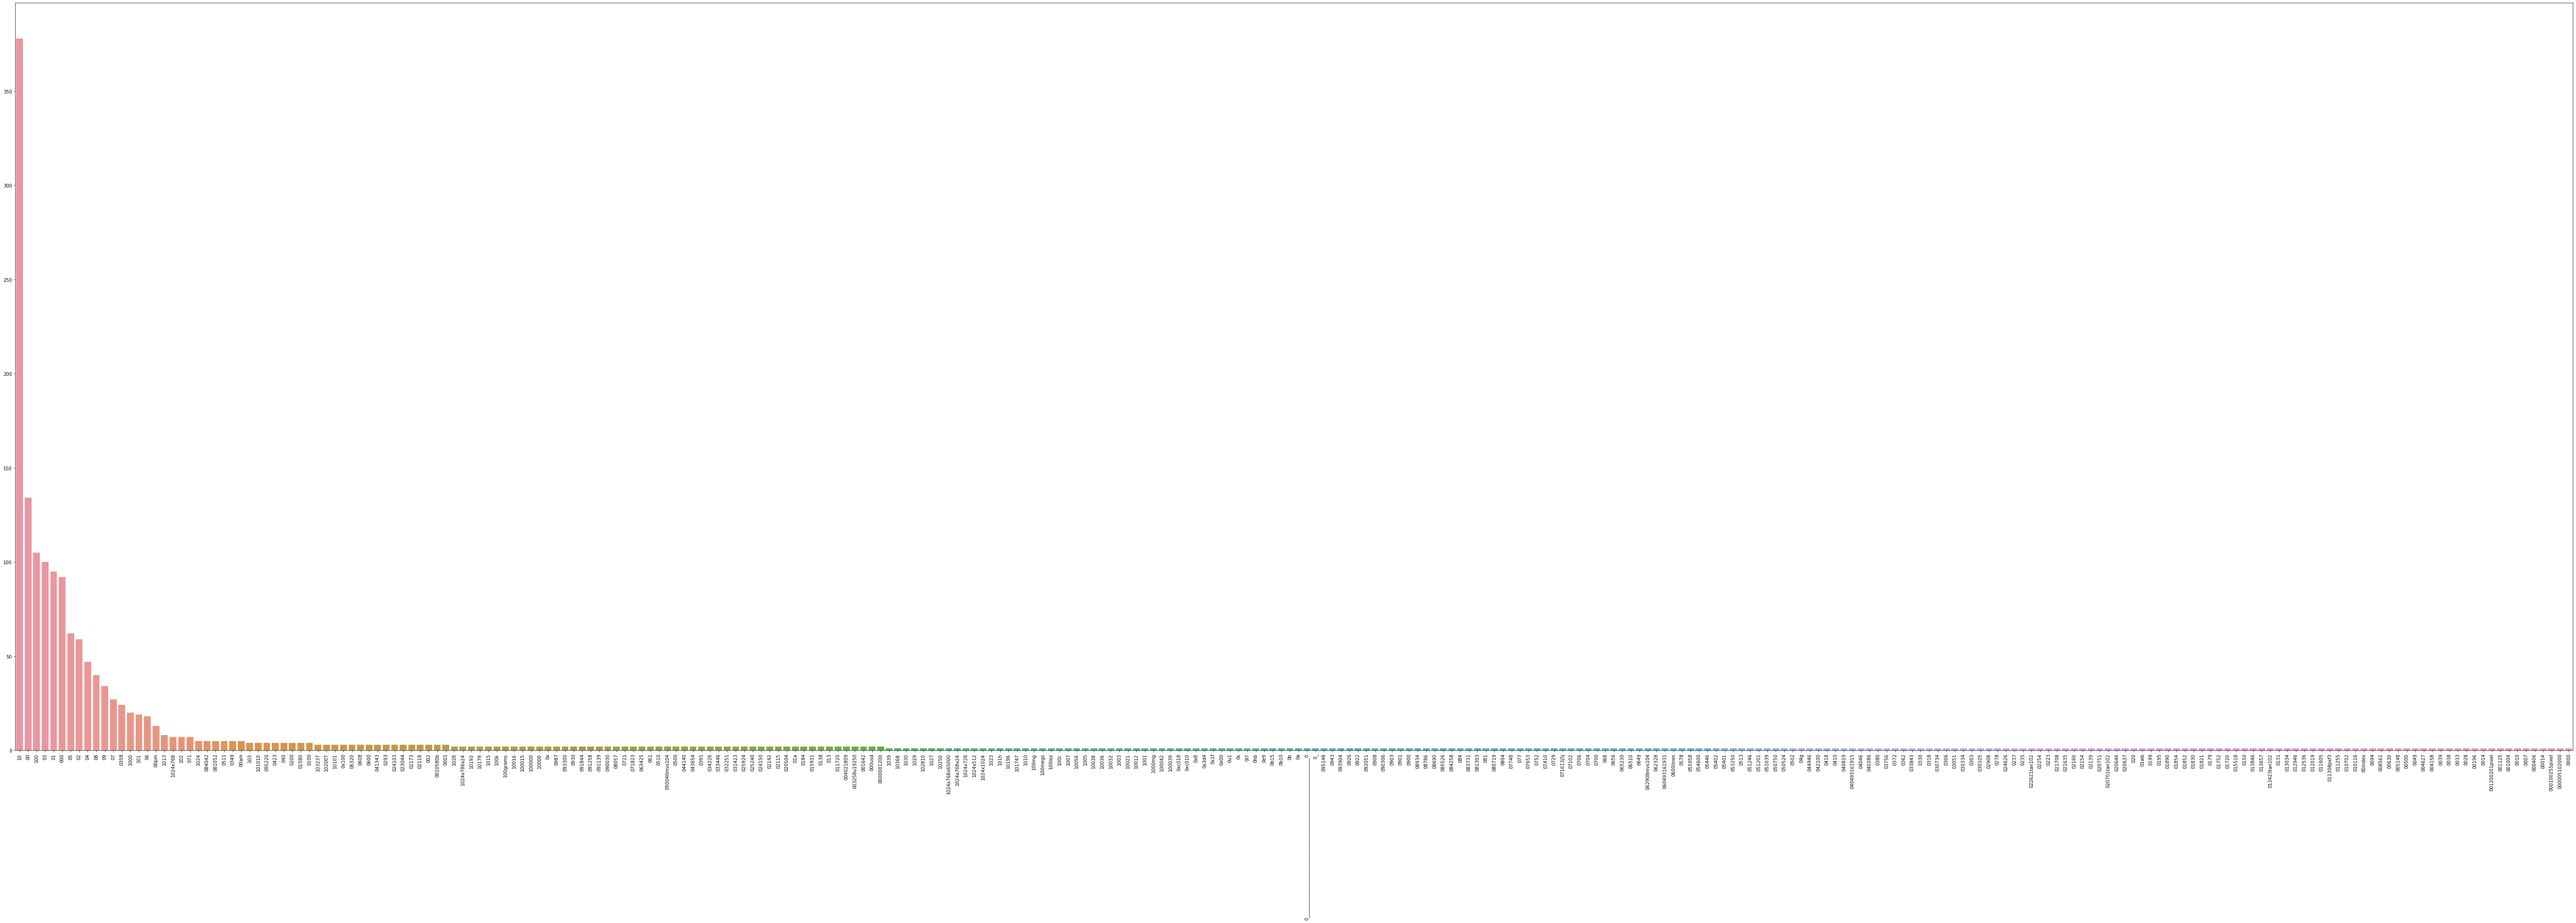

In [151]:
x_sort = count_vect.get_feature_names_out()[:300]
y_sort = term_frequencies[:300]

y_sort, x_sort = (list(i) for i in zip(*sorted(zip(y_sort, x_sort),reverse=True)))

plt.subplots(figsize=(100, 30))
g = sns.barplot(x=x_sort, 
            y=y_sort)
g.set_xticklabels(x_sort, rotation = 90);


In [152]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

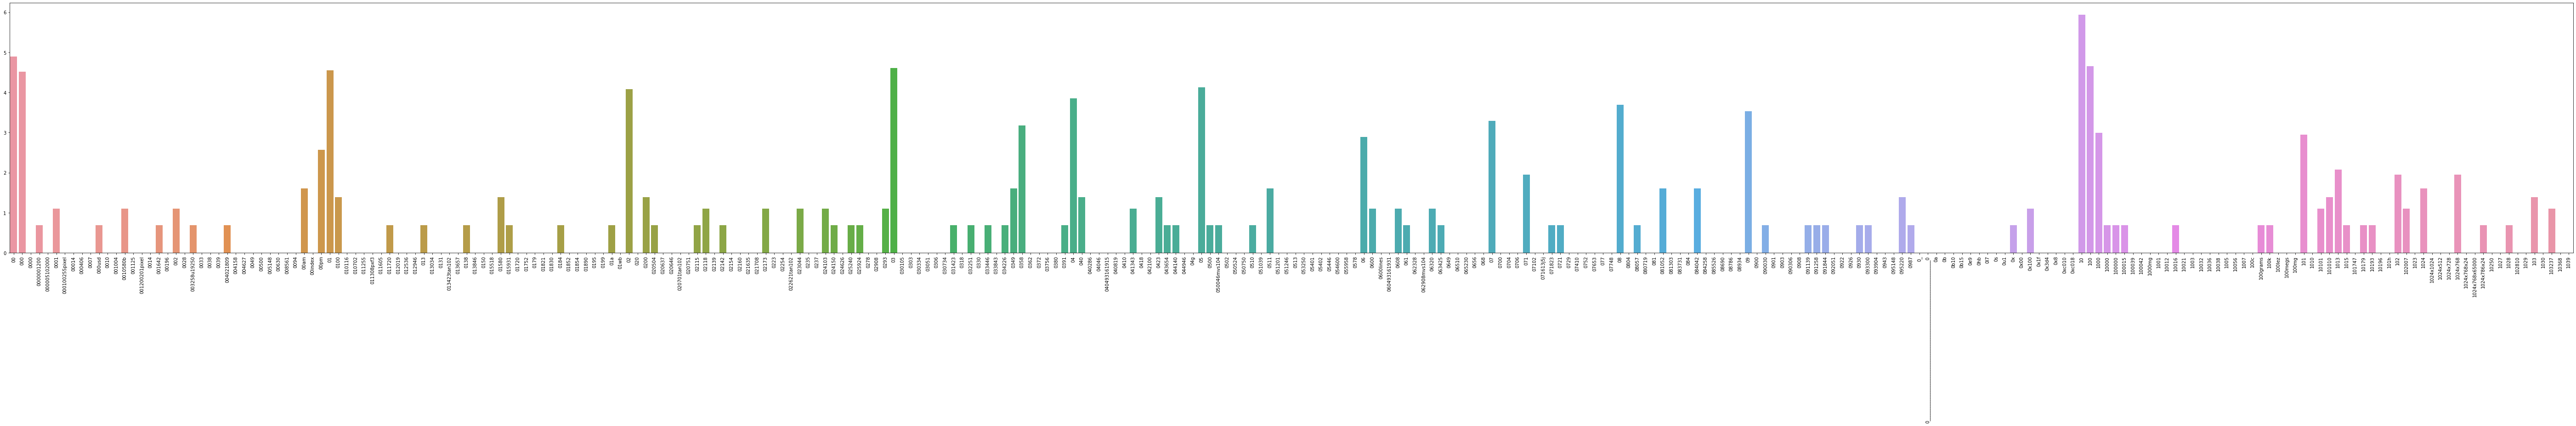

In [153]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### 5.6 Discretization and Binarization

In [154]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [155]:
mlb = preprocessing.LabelBinarizer()

In [156]:
mlb.fit(X.category)

LabelBinarizer()

In [157]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [158]:
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

## >>> Exercise 16 (take home):

In [159]:
type(X['category_name'])
X['bin_category'] = mlb.transform(X['category_name']).tolist()
print(type(X['category_name'][0]))
X[0:20]

<class 'str'>


text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2   From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3   From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4   From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
12  From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13  Subject: So what is Maddi? From: madhaus@netco...         0   
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
16  From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
17  Organization: Penn State University From: <JSN...         0   
18  From: tom_milligan@rainbow.mentorg.com Subject...         3   
19  Subject: Re: Don't more innocents die without ...         0   

             category_name                                           unigrams  \
0            comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1            comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2   soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3   soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4   soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5   soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6   soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                  sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                  sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   
9                  sci.med  [From, :, libman, @, hsc.usc.edu, (, Marlena, ...   
10  soc.religion.christian  [From, :, anasaz, !, karl, @, anasazi.com, (, ...   
11           comp.graphics  [From, :, amjad, @, eng.umd.edu, (, Amjad, A, ...   
12             alt.atheism  [From, :, I3150101, @, dbstu1.rz.tu-bs.de, (, ...   
13             alt.atheism  [Subject, :, So, what, is, Maddi, ?, From, :, ...   
14           comp.graphics  [From, :, sloan, @, cis.uab.edu, (, Kenneth, S...   
15           comp.graphics  [From, :, Mike_Peredo, @, mindlink.bc.ca, (, M...   
16                 sci.med  [From, :, texx, @, ossi.com, (, Robert, ``, Te...   
17             alt.atheism  [Organization, :, Penn, State, University, Fro...   
18  soc.religion.christian  [From, :, tom_milligan, @, rainbow.mentorg.com...   
19             alt.atheism  [Subject, :, Re, :, Do, n't, more, innocents, ...   

    bin_category  
0   [0, 0, 0, 0]  
1   [0, 0, 0, 0]  
2   [0, 0, 0, 0]  
3   [0, 0, 0, 0]  
4   [0, 0, 0, 0]  
5   [0, 0, 0, 0]  
6   [0, 0, 0, 0]  
7   [0, 0, 0, 0]  
8   [0, 0, 0, 0]  
9   [0, 0, 0, 0]  
10  [0, 0, 0, 0]  
11  [0, 0, 0, 0]  
12  [0, 0, 0, 0]  
13  [0, 0, 0, 0]  
14  [0, 0, 0, 0]  
15  [0, 0, 0, 0]  
16  [0, 0, 0, 0]  
17  [0, 0, 0, 0]  
18  [0, 0, 0, 0]  
19  [0, 0, 0, 0]

##### It does not working. Because the value of 'category_name' is str(string), so it cannot generate the binarization.

# 6. Data Exploration

In [160]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [163]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That\'s not my point.  I\'m >philosophically< opposed to it because of its complexity.  This complexity has led to some programs\' poor TIFF writers making some very bizarre files, other programs\' inability to load TIFF images (though they\'ll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It\'s not me I\'m worried about- it\'s all the >other<  assholes out there!"  I\'ve had big trouble with misuse and abuse of TIFF over 

In [164]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [165]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 2 and 3: 0.565566
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# 7. Concluding Remarks
Wow! We have come a long way! We can now call ourselves experts of Data Preprocessing. You should feel excited and proud because the process of Data Mining usually involves 70% preprocessing and 30% training learning models. You will learn this as you progress in the Data Mining course. I really feel that if you go through the exercises and challenge yourself, you are on your way to becoming a super Data Scientist.

From here the possibilities for you are endless. You now know how to use almost every common technique for preprocessing with state-of-the-art tools, such as as Pandas and Scikit-learn. You are now with the trend!

After completing this notebook you can do a lot with the results we have generated. You can train algorithms and models that are able to classify articles into certain categories and much more. You can also try to experiment with different datasets, or venture further into text analytics by using new deep learning techniques such as word2vec. All of this will be presented in the next lab session. Until then, go teach machines how to be intelligent to make the world a better place.

# Second Part: 
follow the same process from the DM2022-Lab1-Master on the new dataset. You don't need to explain all details as we did (some minimal comments explaining your code are useful though). This part is worth 30% of your grade.

    ● Download the the new dataset. The dataset contains a sentence and score label. Read the specificiations of the dataset for details.

    ● You are allowed to use and modify the helper functions in the folder of the first lab session (notice they may need modification) or create your own.


## Get The Data

In [167]:
amazon_cells_labelled_df = pd.read_csv('amazon_cells_labelled.txt',sep='\t',header=None,names=['sentence','score'])

# Data Preparation & Data Transformation

In [168]:
amazon_cells_labelled_df

sentence  score
0    So there is no way for me to plug it in here i...      0
1                          Good case, Excellent value.      1
2                               Great for the jawbone.      1
3    Tied to charger for conversations lasting more...      0
4                                    The mic is great.      1
..                                                 ...    ...
995  The screen does get smudged easily because it ...      0
996  What a piece of junk.. I lose more calls on th...      0
997                       Item Does Not Match Picture.      0
998  The only thing that disappoint me is the infra...      0
999  You can not answer calls with the unit, never ...      0

[1000 rows x 2 columns]

In [169]:
len(amazon_cells_labelled_df)

1000

In [170]:
amazon_cells_labelled_df[0:2]

sentence  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1

In [171]:
for t in amazon_cells_labelled_df["sentence"][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [172]:
# a simple query
amazon_cells_labelled_df[:10][['sentence']]

sentence
0  So there is no way for me to plug it in here i...
1                        Good case, Excellent value.
2                             Great for the jawbone.
3  Tied to charger for conversations lasting more...
4                                  The mic is great.
5  I have to jiggle the plug to get it to line up...
6  If you have several dozen or several hundred c...
7        If you are Razr owner...you must have this!
8                Needless to say, I wasted my money.
9                   What a waste of money and time!.

##### Let's query the last 10 records

In [173]:
amazon_cells_labelled_df[-10:]

sentence  score
990  I'm really disappointed all I have now is a ch...      0
991                                Painful on the ear.      0
992                   Lasted one day and then blew up.      0
993                                      disappointed.      0
994                              Kind of flops around.      0
995  The screen does get smudged easily because it ...      0
996  What a piece of junk.. I lose more calls on th...      0
997                       Item Does Not Match Picture.      0
998  The only thing that disappoint me is the infra...      0
999  You can not answer calls with the unit, never ...      0

In [174]:
# using loc (by label)
amazon_cells_labelled_df.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

In [175]:
# using iloc (by position)
amazon_cells_labelled_df.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

# Data Mining using Pandas

In [176]:
# check missing values
amazon_cells_labelled_df.isnull()

sentence  score
0       False  False
1       False  False
2       False  False
3       False  False
4       False  False
..        ...    ...
995     False  False
996     False  False
997     False  False
998     False  False
999     False  False

[1000 rows x 2 columns]

In [177]:
amazon_cells_labelled_df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [178]:
amazon_cells_labelled_df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
995    (The amoung of missing records is: , 0)
996    (The amoung of missing records is: , 0)
997    (The amoung of missing records is: , 0)
998    (The amoung of missing records is: , 0)
999    (The amoung of missing records is: , 0)
Length: 1000, dtype: object

In [179]:
dummy_series = pd.Series(["dummy_record"], index=["sentence"])

In [180]:
dummy_series

sentence    dummy_record
dtype: object

In [181]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

sentence
0  dummy_record

In [182]:
result_with_series = pd.concat([amazon_cells_labelled_df, dummy_series.to_frame().T], ignore_index=True)

In [183]:
# check if the records was commited into result
len(result_with_series)

1001

In [184]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 1)
dtype: object

In [185]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record'
              }]

In [186]:
amazon_cells_labelled_df = pd.concat([amazon_cells_labelled_df, pd.DataFrame(dummy_dict)], ignore_index=True)

In [187]:
len(amazon_cells_labelled_df)

1001

In [188]:
amazon_cells_labelled_df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 1)
dtype: object

In [189]:
amazon_cells_labelled_df.dropna(inplace=True)

In [190]:
amazon_cells_labelled_df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [191]:
len(amazon_cells_labelled_df)

1000

In [196]:
amazon_cells_labelled_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [197]:
sum(amazon_cells_labelled_df.duplicated())

10

In [198]:
sum(amazon_cells_labelled_df.duplicated('sentence'))

10

In [199]:
dummy_duplicate_dict = [{
                             'sentence': 'dummy record',
                             'score': 1
                        },
                        {
                             'sentence': 'dummy record',
                             'score': 1
                        }]

In [200]:
amazon_cells_labelled_df = pd.concat([amazon_cells_labelled_df, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [201]:
len(amazon_cells_labelled_df)

1002

In [202]:
sum(amazon_cells_labelled_df.duplicated())

11

In [203]:
amazon_cells_labelled_df.drop_duplicates(keep=False, inplace=True) 
# inplace applies changes directly on our dataframe

In [204]:
len(amazon_cells_labelled_df)

980

In [205]:
amazon_cells_labelled_df

sentence  score
0    So there is no way for me to plug it in here i...    0.0
1                          Good case, Excellent value.    1.0
2                               Great for the jawbone.    1.0
3    Tied to charger for conversations lasting more...    0.0
4                                    The mic is great.    1.0
..                                                 ...    ...
995  The screen does get smudged easily because it ...    0.0
996  What a piece of junk.. I lose more calls on th...    0.0
997                       Item Does Not Match Picture.    0.0
998  The only thing that disappoint me is the infra...    0.0
999  You can not answer calls with the unit, never ...    0.0

[980 rows x 2 columns]

# Data Preprocessing

In [206]:
df_sample = amazon_cells_labelled_df.sample(n=500) #random state

In [207]:
len(df_sample)

500

In [208]:
df_sample[0:4]

sentence  score
533  So I basically threw my money out the window f...    0.0
581  Verizon tech support walked my through a few p...    0.0
251          O my gosh the best phone I have ever had.    1.0
790                                 NOT WHAT I WANTED.    0.0

0.0    494
1.0    486
Name: score, dtype: int64


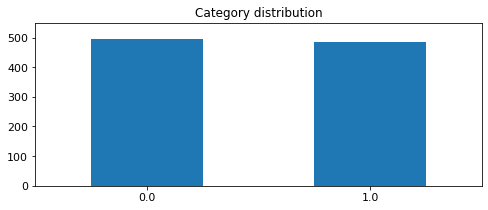

In [209]:
print(amazon_cells_labelled_df.score.value_counts())

# plot barchart for amazon_cells_labelled_df
amazon_cells_labelled_df.score.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 550],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

0.0    255
1.0    245
Name: score, dtype: int64


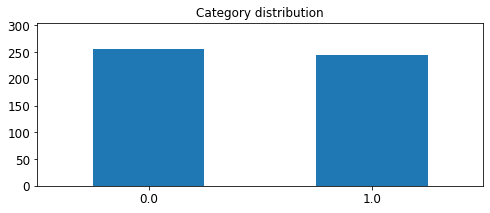

In [210]:
print(df_sample.score.value_counts())

# plot barchart for df_sample
upper_bound = max(df_sample.score.value_counts() + 50) 
df_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

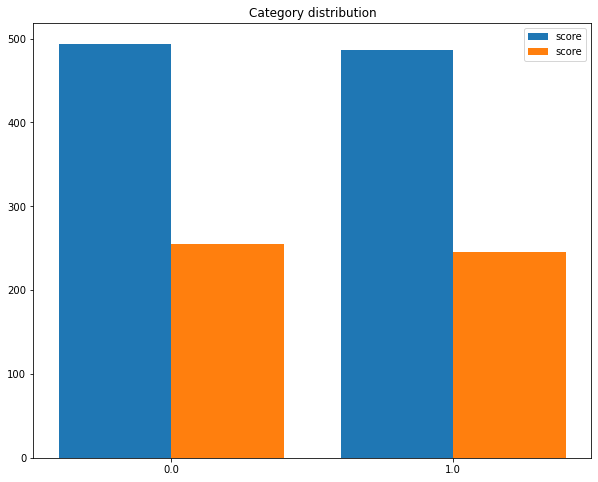

In [211]:
plt.figure(figsize=(10,8))

X_axis = np.arange(len(amazon_cells_labelled_df.score.value_counts().array))

plt.bar(X_axis-0.2, amazon_cells_labelled_df.score.value_counts().array, 0.4,
        label='score')

plt.bar(X_axis+0.2, df_sample.score.value_counts().array, 0.4,
        label='score')


plt.xticks(X_axis, amazon_cells_labelled_df['score'].value_counts().index)
plt.title("Category distribution")
plt.legend()
plt.show()

In [212]:
# takes a like a minute or two to process
amazon_cells_labelled_df['unigrams'] = amazon_cells_labelled_df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [213]:
amazon_cells_labelled_df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [214]:
amazon_cells_labelled_df[0:4]

sentence  score  \
0  So there is no way for me to plug it in here i...    0.0   
1                        Good case, Excellent value.    1.0   
2                             Great for the jawbone.    1.0   
3  Tied to charger for conversations lasting more...    0.0   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

In [215]:
list(amazon_cells_labelled_df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [216]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(amazon_cells_labelled_df.sentence) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (0, 1489)	1
  (0, 1607)	1
  (0, 853)	1
  (0, 1073)	1
  (0, 1764)	1
  (0, 652)	1
  (0, 992)	1
  (0, 1638)	1
  (0, 1210)	1
  (0, 856)	1
  (0, 813)	2
  (0, 761)	1
  (0, 1602)	1
  (0, 1712)	1
  (0, 1700)	1
  (0, 710)	1
  (0, 232)	1
  (0, 366)	1


In [217]:
count_vect.get_feature_names_out()[1489]

'so'

In [218]:
count_vect.get_feature_names_out()[1607]

'there'

In [219]:
analyze(amazon_cells_labelled_df.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [220]:
analyze(" ".join(list(amazon_cells_labelled_df[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [221]:
df_counts.shape

(980, 1845)

In [222]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['10', '100', '11', '12', '13', '15', '15g', '18', '20', '2000'],
      dtype=object)

In [223]:
# we convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [224]:
count_vect.get_feature_names_out()[0:1]

array(['10'], dtype=object)

In [225]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]

In [226]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]

In [227]:
plot_z = df_counts[0:100, 0:100].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

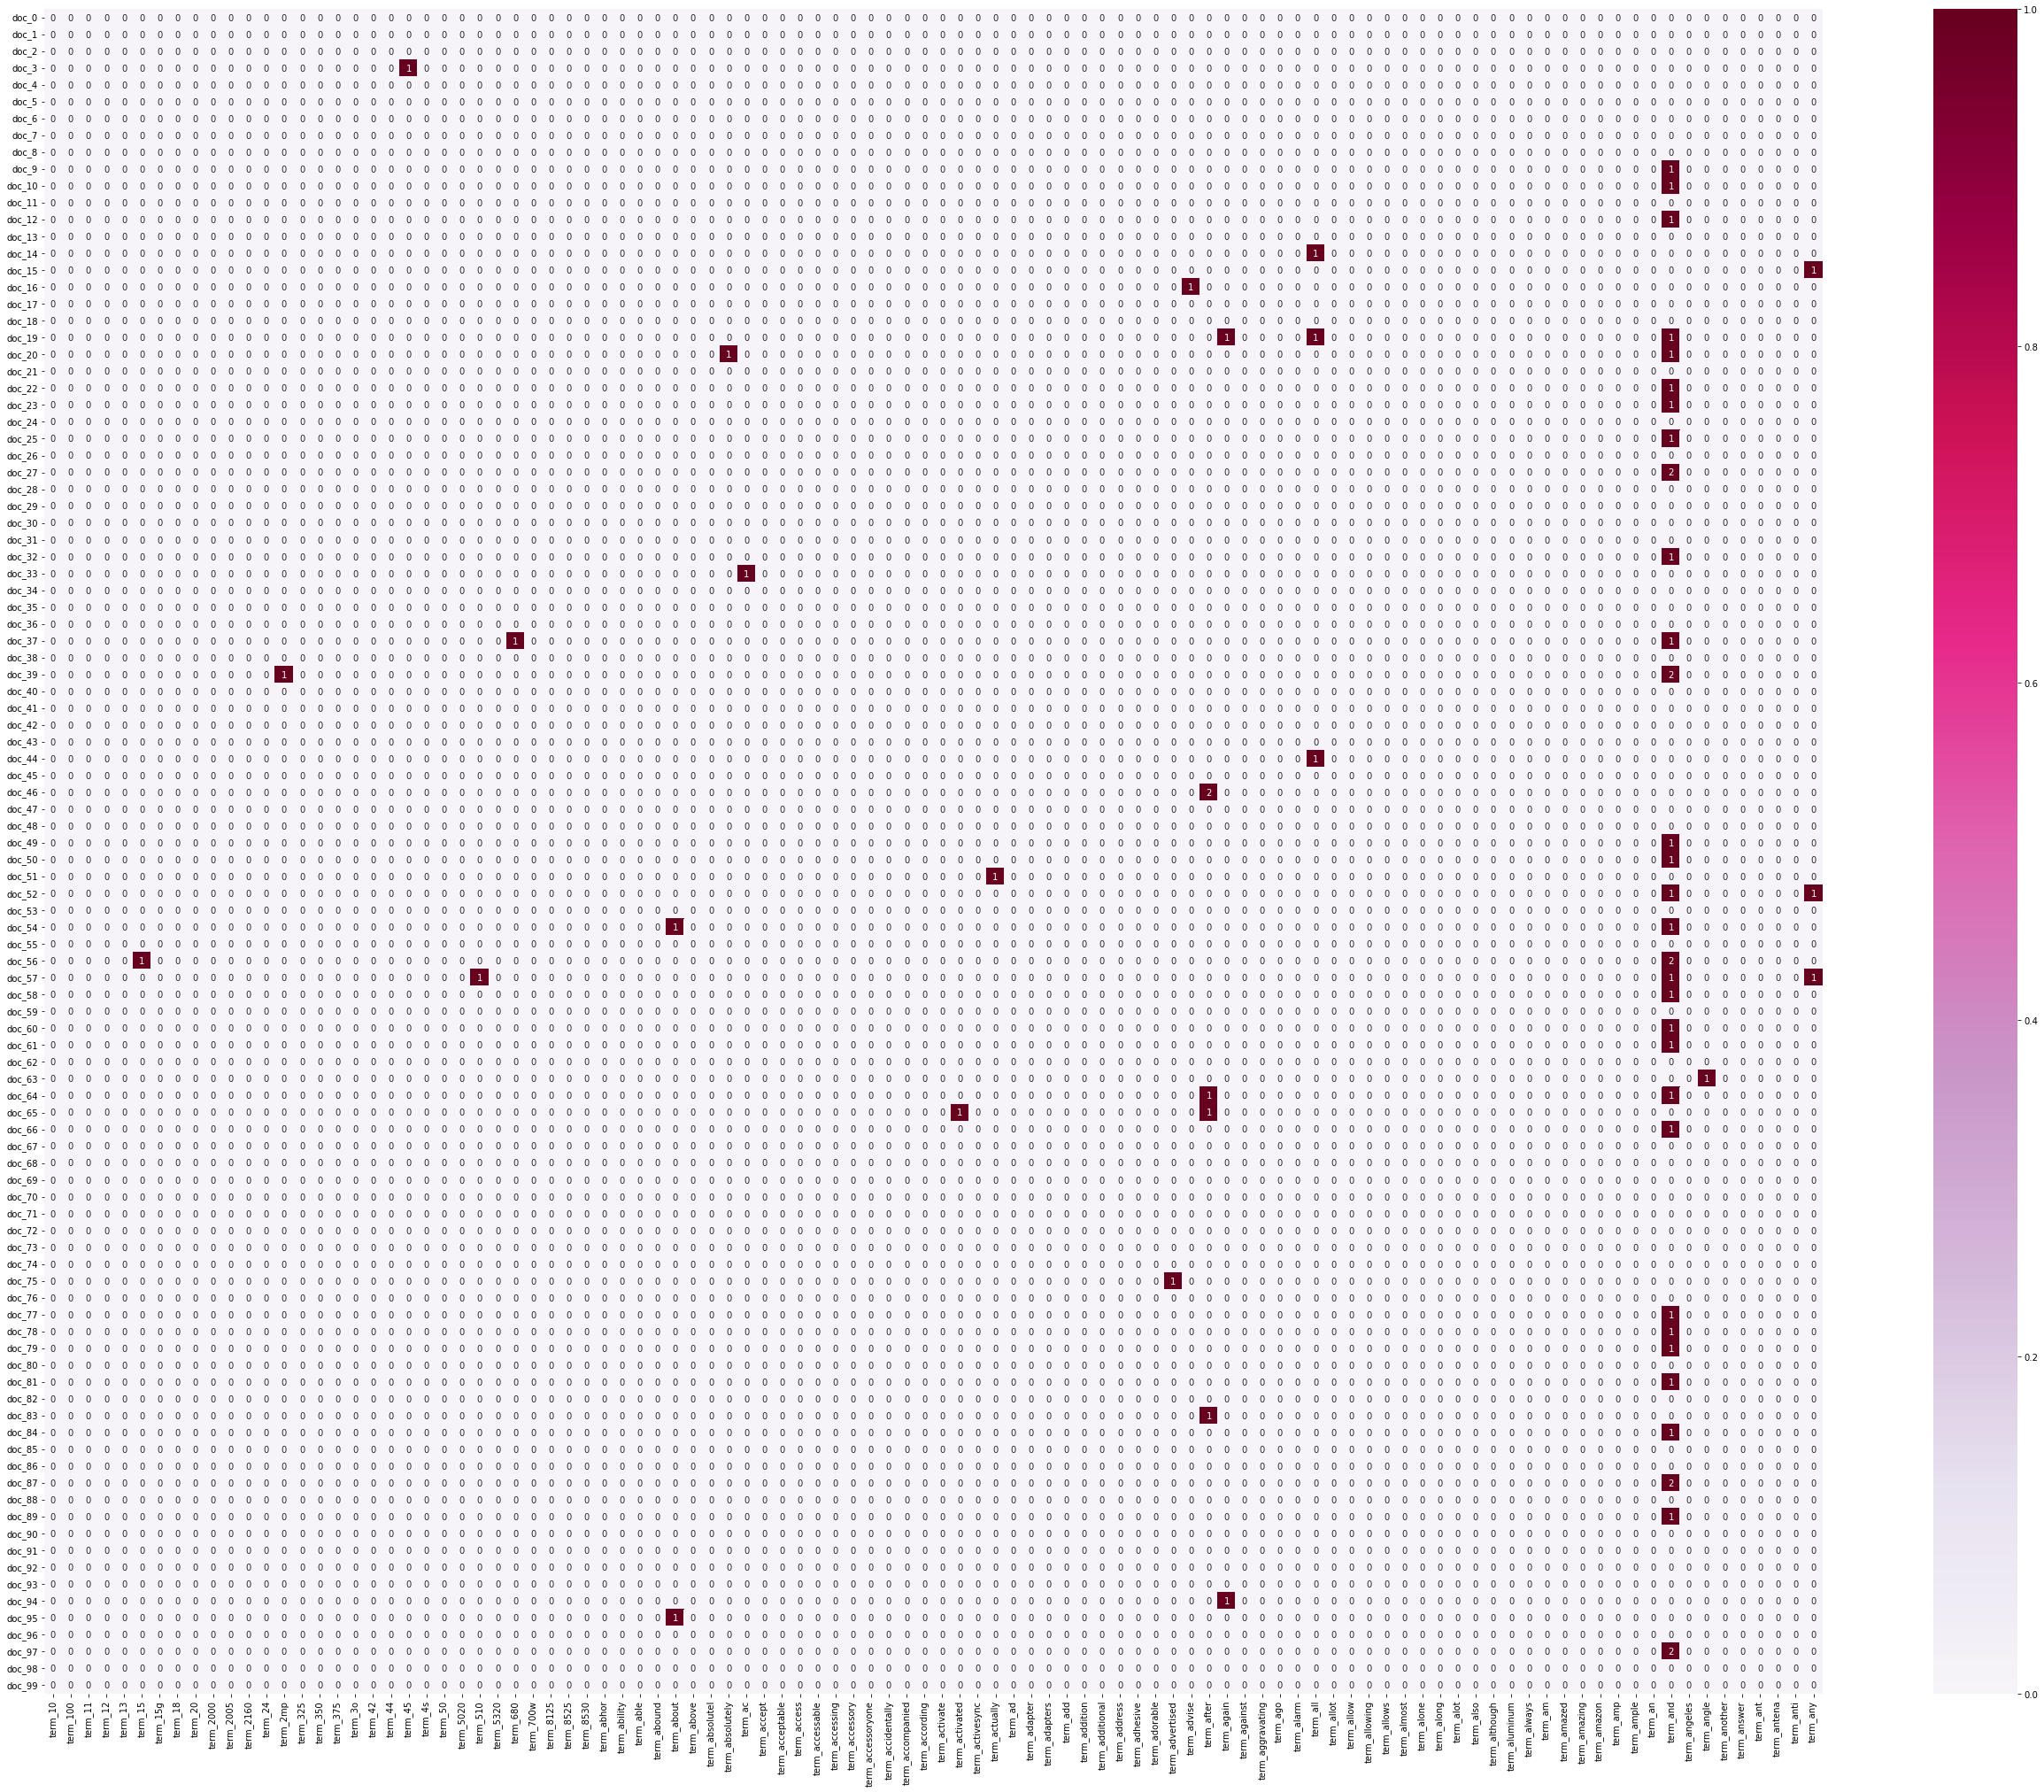

In [228]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(45, 35))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [229]:
X_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

In [230]:
X_reduced.shape

(980, 2)

In [231]:
score = [0.0,1.0]
score

[0.0, 1.0]

In [232]:
X_reduced

array([[ 0.86828961,  0.45643848],
       [-0.80035395, -0.33170014],
       [ 0.08634155, -0.65983638],
       ...,
       [-0.77461072, -0.22751738],
       [ 1.24504998, -1.04170412],
       [ 0.21568195, -0.6182888 ]])

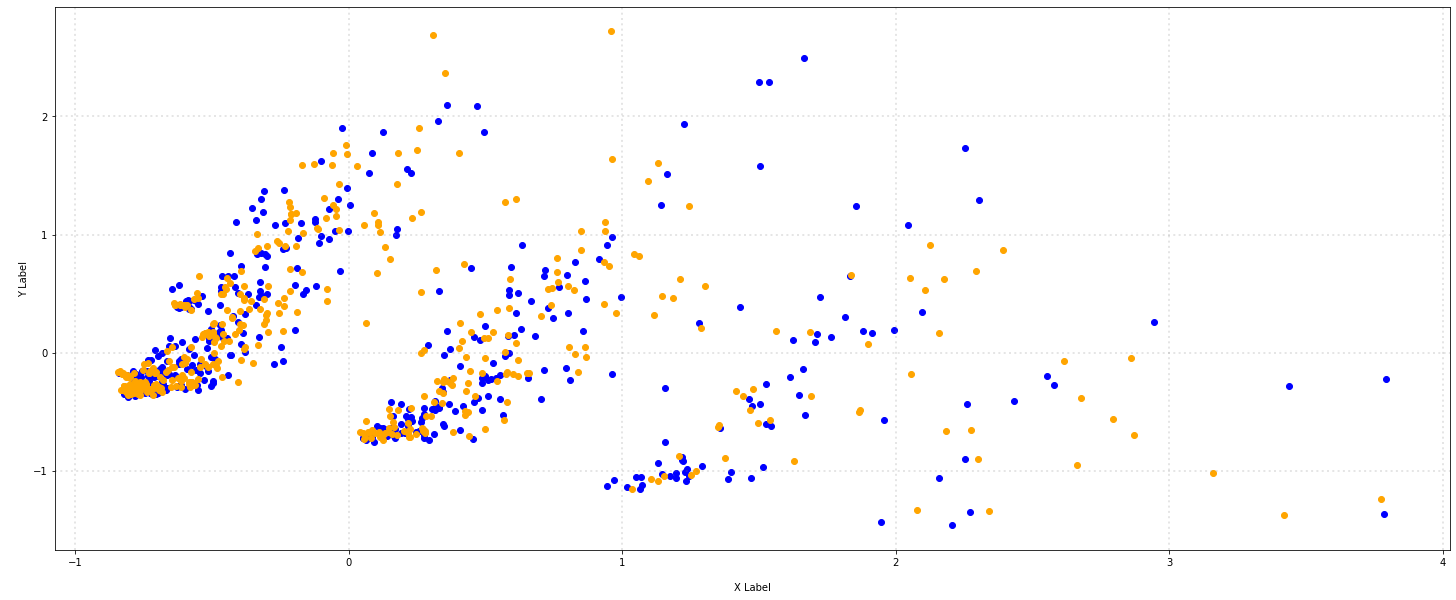

In [233]:
col = ['blue', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, s in zip(col, score):
    xs = X_reduced[amazon_cells_labelled_df['score'] == s].T[0]
    ys = X_reduced[amazon_cells_labelled_df['score'] == s].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

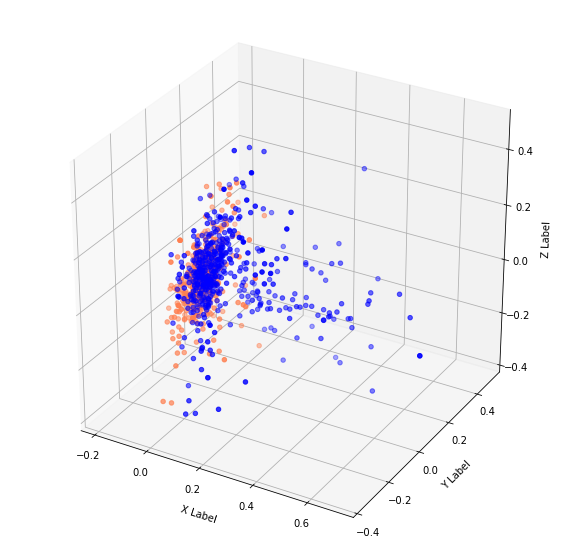

In [277]:
X_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,10))
#ax = fig.subplots()
ax = fig.add_subplot(111, projection='3d')

for c, s in zip(col, score):
    xs = X_reduced[amazon_cells_labelled_df['score'] == s].T[0]
    ys = X_reduced[amazon_cells_labelled_df['score'] == s].T[1]
    zs = X_reduced[amazon_cells_labelled_df['score'] == s].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

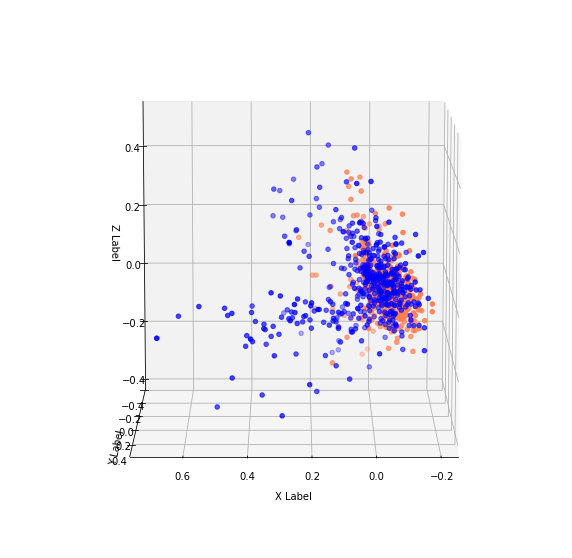

In [278]:
X_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,10))
#ax = fig.subplots()
ax = fig.add_subplot(111, projection='3d')

for c, s in zip(col, score):
    xs = X_reduced[amazon_cells_labelled_df['score'] == s].T[0]
    ys = X_reduced[amazon_cells_labelled_df['score'] == s].T[1]
    zs = X_reduced[amazon_cells_labelled_df['score'] == s].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=10,azim=90)
plt.show()

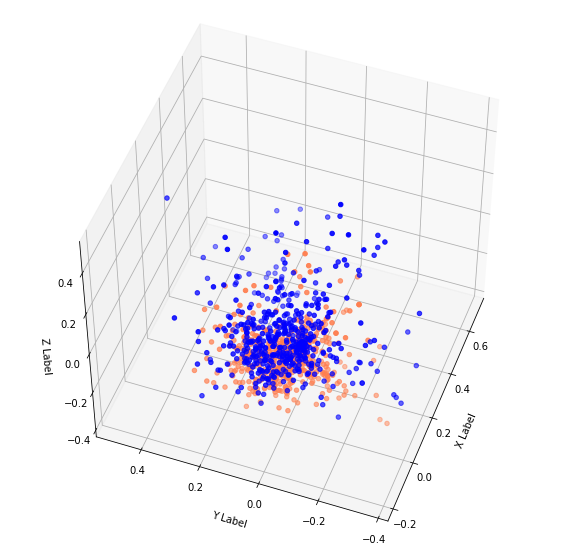

In [279]:
X_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,10))
#ax = fig.subplots()
ax = fig.add_subplot(111, projection='3d')

for c, s in zip(col, score):
    xs = X_reduced[amazon_cells_labelled_df['score'] == s].T[0]
    ys = X_reduced[amazon_cells_labelled_df['score'] == s].T[1]
    zs = X_reduced[amazon_cells_labelled_df['score'] == s].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=50,azim=200)
plt.show()

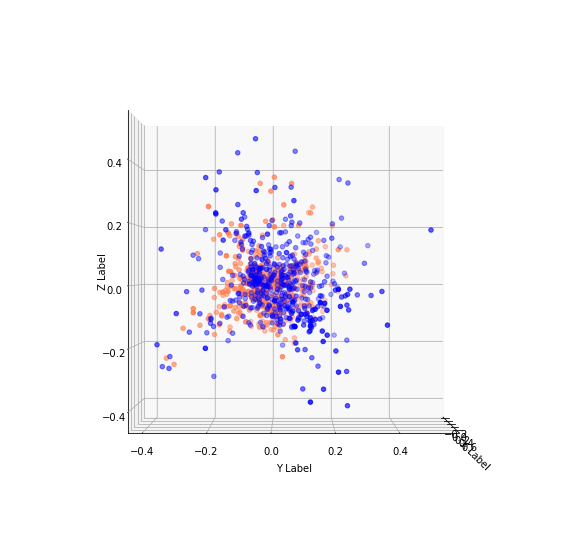

In [280]:
X_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,10))
#ax = fig.subplots()
ax = fig.add_subplot(111, projection='3d')

for c, s in zip(col, score):
    xs = X_reduced[amazon_cells_labelled_df['score'] == s].T[0]
    ys = X_reduced[amazon_cells_labelled_df['score'] == s].T[1]
    zs = X_reduced[amazon_cells_labelled_df['score'] == s].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev=0,azim=0)
plt.show()

In [234]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [235]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [236]:
term_frequencies[0]

4

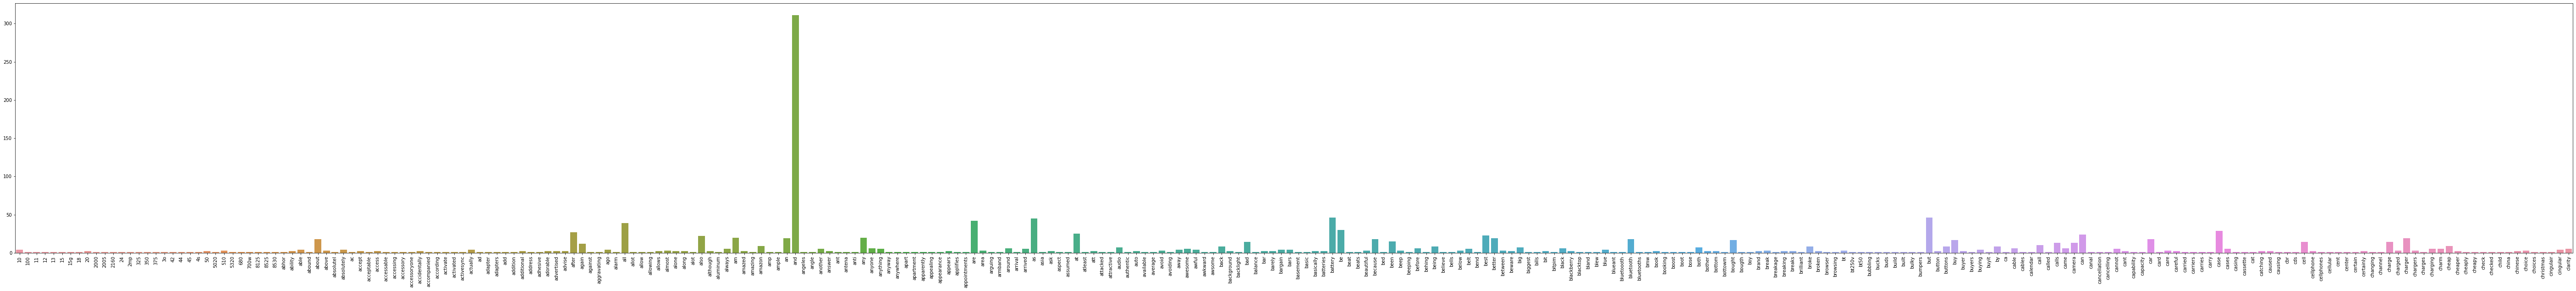

In [237]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [281]:
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])

fig.show()


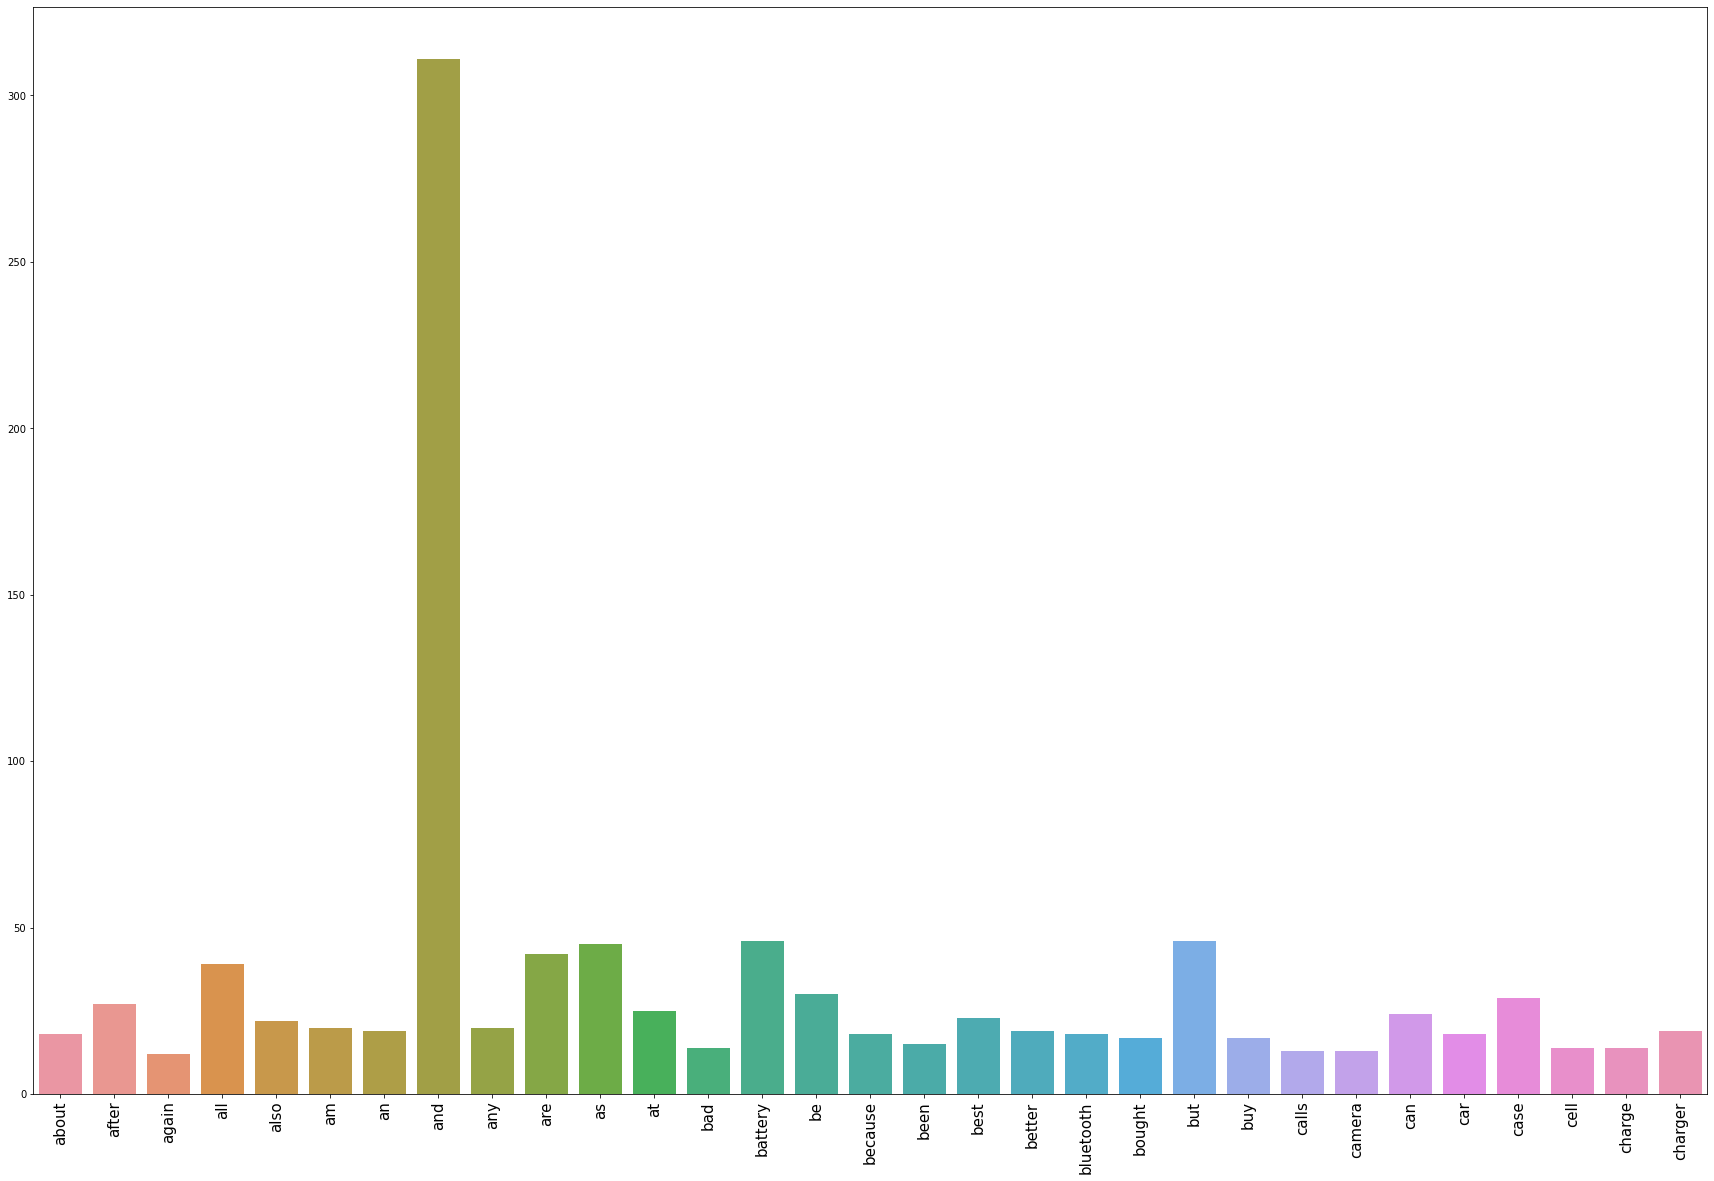

In [282]:
index = np.where(term_frequencies[:300] <= 10)
TF_reduce = np.delete(term_frequencies[:300], index)
CV_reduce = np.delete(count_vect.get_feature_names_out()[:300], index)

plt.subplots(figsize=(30, 20))
g = sns.barplot(x=CV_reduce, 
            y=TF_reduce)
g.set_xticklabels(CV_reduce, rotation = 90, fontsize = 15);

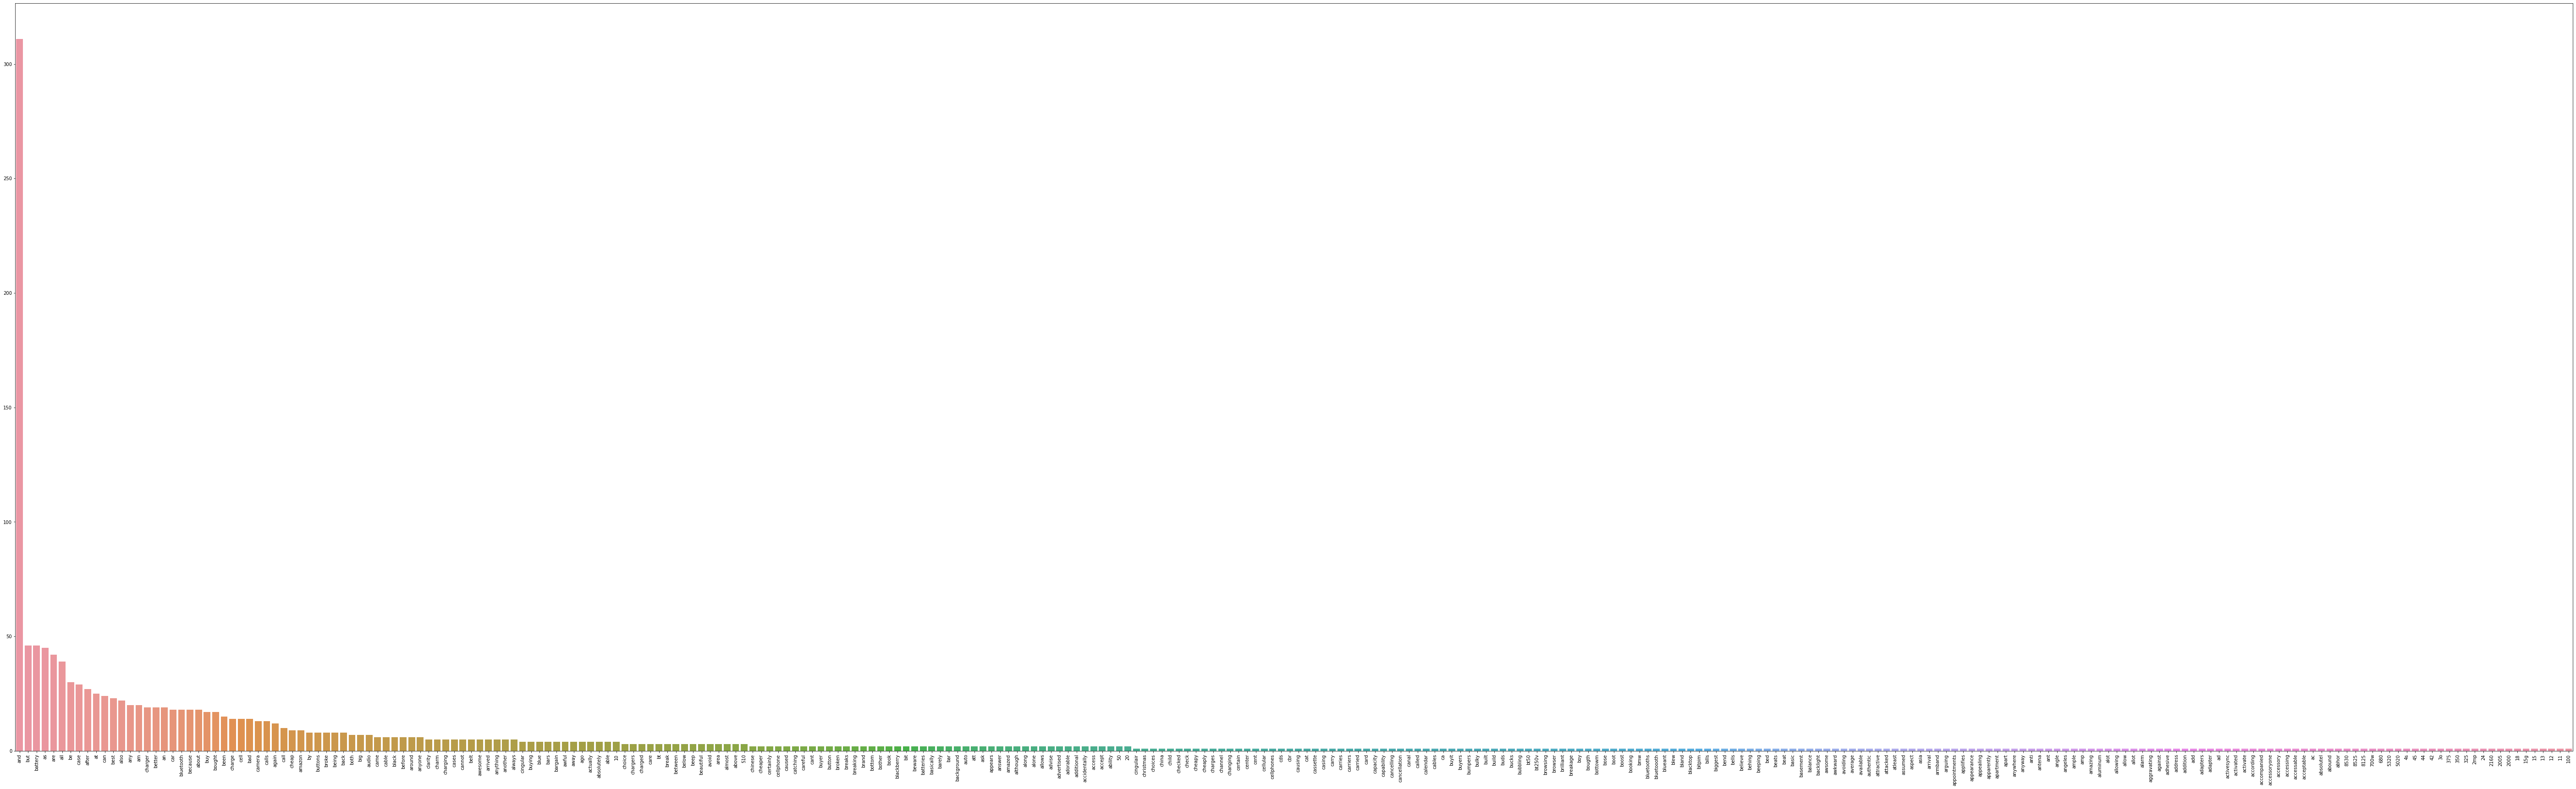

In [283]:
x_sort = count_vect.get_feature_names_out()[:300]
y_sort = term_frequencies[:300]

y_sort, x_sort = (list(i) for i in zip(*sorted(zip(y_sort, x_sort),reverse=True)))

plt.subplots(figsize=(100, 30))
g = sns.barplot(x=x_sort, 
            y=y_sort)
g.set_xticklabels(x_sort, rotation = 90);


In [238]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

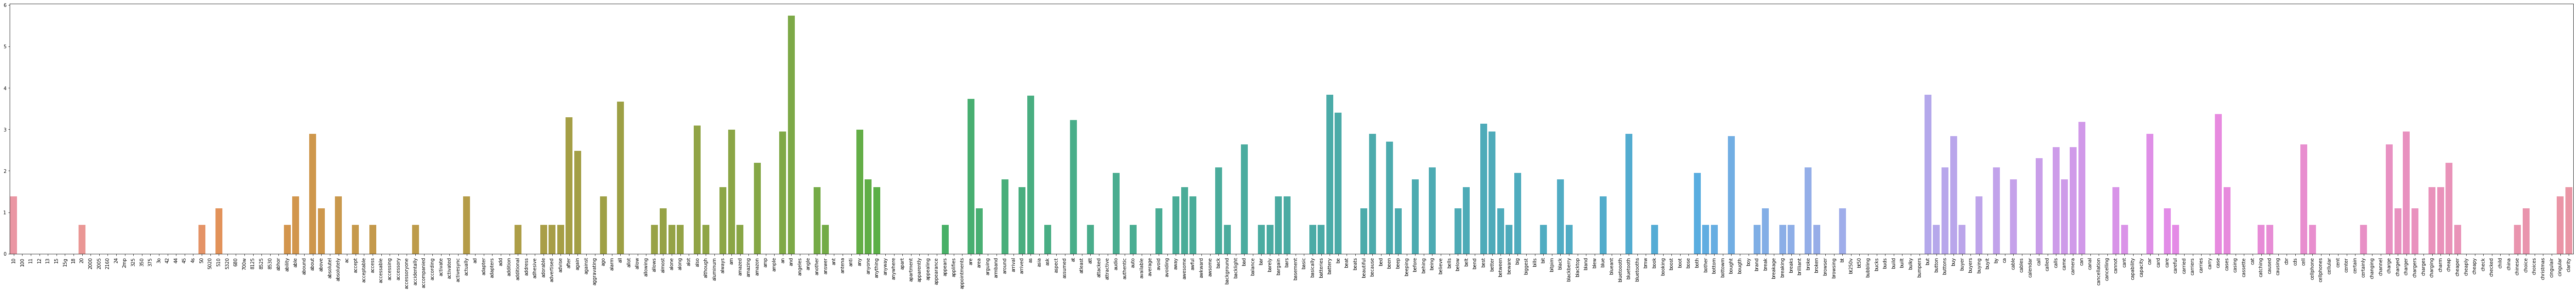

In [239]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [240]:
mlb = preprocessing.LabelBinarizer()

In [241]:
mlb.fit(amazon_cells_labelled_df.score)

LabelBinarizer()

In [242]:
amazon_cells_labelled_df['bin_category'] = mlb.transform(amazon_cells_labelled_df['score']).tolist()

In [243]:
amazon_cells_labelled_df[0:9]

sentence  score  \
0  So there is no way for me to plug it in here i...    0.0   
1                        Good case, Excellent value.    1.0   
2                             Great for the jawbone.    1.0   
3  Tied to charger for conversations lasting more...    0.0   
4                                  The mic is great.    1.0   
5  I have to jiggle the plug to get it to line up...    0.0   
6  If you have several dozen or several hundred c...    0.0   
7        If you are Razr owner...you must have this!    1.0   
8                Needless to say, I wasted my money.    0.0   

                                            unigrams bin_category  
0  [So, there, is, no, way, for, me, to, plug, it...          [0]  
1               [Good, case, ,, Excellent, value, .]          [1]  
2                      [Great, for, the, jawbone, .]          [1]  
3  [Tied, to, charger, for, conversations, lastin...          [0]  
4                           [The, mic, is, great, .]          [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...          [0]  
6  [If, you, have, several, dozen, or, several, h...          [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...          [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]          [0]

# Data Exploration

In [244]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = amazon_cells_labelled_df.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = amazon_cells_labelled_df.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = amazon_cells_labelled_df.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [245]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [246]:
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [247]:
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Third Part 

### New data visualizations

In [248]:
yelp_labelled_df = pd.read_csv('yelp_labelled.txt',sep='\t',header=None,names=['sentence','score'])
imdb_labelled_df = pd.read_csv('imdb_labelled.txt',sep='\t',header=None,names=['sentence','score'])

In [249]:
yelp_labelled_df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
imdb_labelled_df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [250]:
yelp_labelled_df

sentence  score
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[992 rows x 2 columns]

In [251]:
imdb_labelled_df

sentence  score
0    A very, very, very slow-moving, aimless movie ...      0
1    Not sure who was more lost - the flat characte...      0
2    Attempting artiness with black & white and cle...      0
3         Very little music or anything to speak of.        0
4    The best scene in the movie was when Gerardo i...      1
..                                                 ...    ...
743  I just got bored watching Jessice Lange take h...      0
744  Unfortunately, any virtue in this film's produ...      0
745                   In a word, it is embarrassing.        0
746                               Exceptionally bad!        0
747  All in all its an insult to one's intelligence...      0

[742 rows x 2 columns]

In [252]:
amazon_0 = amazon_cells_labelled_df.score.value_counts().array[0]
amazon_1 = amazon_cells_labelled_df.score.value_counts().array[1]

print("The amounts of the 'Score' in amazon data equal to '1': %d" %amazon_1)
print("The amounts of the 'Score' in amazon data equal to '0': %d" %amazon_0)

The amounts of the 'Score' in amazon data equal to '1': 486
The amounts of the 'Score' in amazon data equal to '0': 494


In [253]:
yelp_1 = yelp_labelled_df.score.value_counts().array[0]
yelp_0 = yelp_labelled_df.score.value_counts().array[1]

print("The amounts of the 'Score' in yelp data equal to '1': %d" %yelp_1)
print("The amounts of the 'Score' in yelp data equal to '0': %d" %yelp_0)

The amounts of the 'Score' in yelp data equal to '1': 498
The amounts of the 'Score' in yelp data equal to '0': 494


In [254]:
imdb_1 = imdb_labelled_df.score.value_counts().array[0]
imdb_0 = imdb_labelled_df.score.value_counts().array[1]

print("The amounts of the 'Score' in imdb data equal to '1': %d" %imdb_1)
print("The amounts of the 'Score' in imdb data equal to '0': %d" %imdb_0)

The amounts of the 'Score' in imdb data equal to '1': 382
The amounts of the 'Score' in imdb data equal to '0': 360


In [255]:
# Amounts of 'Score' are '0' in three data
score_0 = [amazon_0, yelp_0, imdb_0]
score_0

[494, 494, 360]

In [256]:
# Amounts of 'Score' are '0' in three data 
score_1 = [amazon_1, yelp_1, imdb_1]
score_1

[486, 498, 382]

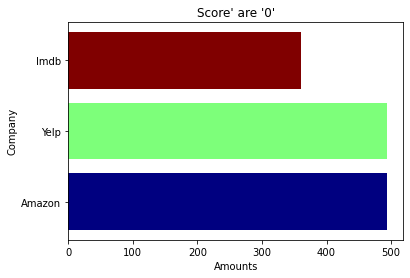

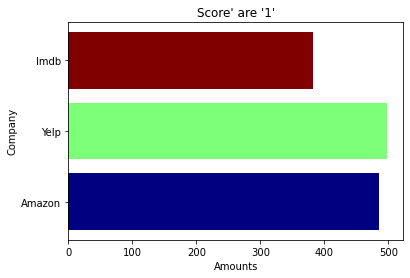

In [257]:
from matplotlib import cm

company_df = ['Amazon', 'Yelp','Imdb']
x = np.arange(len(company_df))
cmap = cm.jet(np.linspace(0, 1, len(company_df)))
plt.barh(x, score_0, color=cmap)
plt.yticks(x, company_df)
plt.ylabel('Company')
plt.xlabel('Amounts')
plt.title("Score' are '0'")
plt.show()

cmap = cm.jet(np.linspace(0, 1, len(company_df)))
plt.barh(x, score_1, color=cmap)
plt.yticks(x, company_df)
plt.ylabel('Company')
plt.xlabel('Amounts')
plt.title("Score' are '1'")
plt.show()

In [258]:
df = pd.DataFrame([
    ['Amazon', amazon_0, amazon_1],
    ['Yelp', yelp_0, yelp_1],
    ['Imdb', imdb_0, imdb_1],
], columns=['Company','0','1'])
px.bar(df, x='Company', y=['0', '1'], title='Score')

### TF-IDF features

In [259]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
df_counts = vectorizer.fit_transform(amazon_cells_labelled_df['sentence'])
vectorizer.get_feature_names_out()

array(['10', '100', '11', ..., 'your', 'z500a', 'zero'], dtype=object)

In [260]:
print(df_counts.shape)

(980, 1845)


In [285]:
df_counts.toarray()[0:4,0:50]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0. 

In [288]:
df_countvect = pd.DataFrame(data = df_counts.toarray(),columns = count_vect.get_feature_names_out())
df_countvect.head(3)

10  100   11   12   13   15  15g   18   20  2000  ...  wrongly  year  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...      0.0   0.0   

   years  yell  yes  yet  you  your  z500a  zero  
0    0.0   0.0  0.0  0.0  0.0   0.0    0.0   0.0  
1    0.0   0.0  0.0  0.0  0.0   0.0    0.0   0.0  
2    0.0   0.0  0.0  0.0  0.0   0.0    0.0   0.0  

[3 rows x 1845 columns]

In [262]:
print(df_counts[0])

  (0, 366)	0.32988408987411494
  (0, 232)	0.2609276093470387
  (0, 710)	0.2724494622231399
  (0, 1700)	0.298105811601252
  (0, 1712)	0.3112949887470082
  (0, 1602)	0.09030260323141764
  (0, 761)	0.2878754910180688
  (0, 813)	0.31489347703392695
  (0, 856)	0.10690200352068094
  (0, 1210)	0.24773843220128242
  (0, 1638)	0.1270209584562051
  (0, 992)	0.20728409623953437
  (0, 652)	0.14616243210220933
  (0, 1764)	0.2663275333283891
  (0, 1073)	0.21408861388915978
  (0, 853)	0.11717659872292288
  (0, 1607)	0.22914933107417576
  (0, 1489)	0.19140858968288985


### Naive Bayes classifier

##### 1. Importing Libraries 

In [263]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

##### 2. Loading Data

In [264]:
X_train, X_test, y_train, y_test = train_test_split(amazon_cells_labelled_df['sentence'], amazon_cells_labelled_df['score'], test_size = 0.3, random_state = 0)

In [265]:
X_train.shape, X_test.shape

((686,), (294,))

##### 3. Applying tf vectorizer (count vectorizer)

In [266]:
t = time()  # not compulsory

# loading CountVectorizer
tf_vectorizer = CountVectorizer() # or term frequency

X_train_tf = tf_vectorizer.fit_transform(X_train)

duration = time() - t
print("Time taken to extract features from training data : %f seconds" % (duration))
print("n_samples: %d, n_features: %d" % X_train_tf.shape)

Time taken to extract features from training data : 0.007997 seconds
n_samples: 686, n_features: 1511


##### 4. Transforming test data into tf-vectorized matrix

In [267]:
t = time()
X_test_tf = tf_vectorizer.transform(X_test)

duration = time() - t
print("Time taken to extract features from test data : %f seconds" % (duration))
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

Time taken to extract features from test data : 0.002000 seconds
n_samples: 294, n_features: 1511


##### 5. Applying Naive Bayes

In [268]:
# build naive bayes classification model
t = time()

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, y_train)

training_time = time() - t
print("train time: %0.3fs" % training_time)

train time: 0.001s


##### 6. Calculating accuracy and generating classification report from test data

In [269]:
# predict the new document from the testing dataset
t = time()
y_pred = naive_bayes_classifier.predict(X_test_tf)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

test time:  0.000s
accuracy:   0.813
              precision    recall  f1-score   support

    Positive       0.86      0.77      0.81       153
    Negative       0.78      0.86      0.81       141

    accuracy                           0.81       294
   macro avg       0.82      0.81      0.81       294
weighted avg       0.82      0.81      0.81       294

confusion matrix:
[[118  35]
 [ 20 121]]
------------------------------


In [270]:
y_pred.shape

(294,)

In [271]:
t = time()  # not compulsory

# loading CountVectorizer
tf_vectorizer = TfidfVectorizer() # or term frequency

X_train_tf = tf_vectorizer.fit_transform(X_train)

duration = time() - t
print("Time taken to extract features from training data : %f seconds" % (duration))
print("n_samples: %d, n_features: %d" % X_train_tf.shape)

Time taken to extract features from training data : 0.008002 seconds
n_samples: 686, n_features: 1511


In [272]:
# build naive bayes classification model
t = time()

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_tf.toarray(), y_train)

training_time = time() - t
print("train time: %0.3fs" % training_time)

train time: 0.011s


In [273]:
# predict the new document from the testing dataset
t = time()
y_pred = naive_bayes_classifier.predict(X_test_tf.toarray())

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

test time:  0.007s
accuracy:   0.769
              precision    recall  f1-score   support

    Positive       0.81      0.73      0.77       153
    Negative       0.73      0.82      0.77       141

    accuracy                           0.77       294
   macro avg       0.77      0.77      0.77       294
weighted avg       0.77      0.77      0.77       294

confusion matrix:
[[111  42]
 [ 26 115]]
------------------------------


In [289]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm1)
print('\nTP=',cm1[0,0])
print('\nTN=',cm1[1,1])
print('\nFP=',cm1[0,1])
print('\nFN=',cm1[1,0])

Confusion matrix

 [[111  42]
 [ 26 115]]

TP= 111

TN= 115

FP= 42

FN= 26


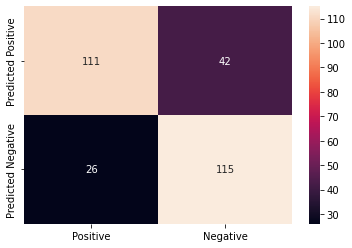

In [290]:
cm_matrix1 = pd.DataFrame(data=cm1, columns=['Positive', 'Negative'], 
                                 index=['Predicted Positive', 'Predicted Negative'])

sns.heatmap(cm_matrix1, annot=True, fmt='d')
plt.show()

# Fourth Part
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

### For the lab 
I think this lab is very good, I appreciate a lot that the teacher and TAs supply those useful information in data mining.In this lab, the only thing I dislike is that it is too many to do(just joking🤣) , I think it a little bit difficult for the newbie. And I got confused in some part,such as the feature Creation and  feature subset selection. I hope next time there have more time for TA to tech and explain the information in the LAB, because this time it is just 3 hour class that TA have to teach rapidly. In this case, we cannot understand those idea immediatly.

### For the homework
I think this homework is a challenge for me, because we have to search many new information byself, some are interesting and some are too difficult to understand.